In [1]:
from my_library import *

In [2]:
df = pd.read_csv('../Data_e-commerce/col_preprocessing_complete.csv')
df.head()

order_purchase_timestamp    order_approved_at  order_item_id  price  \
0      2017-10-02 10:56:33  2017-10-02 11:07:15            1.0  29.99   
1      2017-10-02 10:56:33  2017-10-02 11:07:15            1.0  29.99   
2      2017-10-02 10:56:33  2017-10-02 11:07:15            1.0  29.99   
3      2017-08-15 18:29:31  2017-08-15 20:05:16            1.0  29.99   
4      2017-08-02 18:24:47  2017-08-02 18:43:15            1.0  29.99   

   freight_value  payment_sequential payment_type  payment_installments  \
0           8.72                 1.0  credit_card                   1.0   
1           8.72                 3.0      voucher                   1.0   
2           8.72                 2.0      voucher                   1.0   
3           7.78                 1.0  credit_card                   3.0   
4           7.78                 1.0  credit_card                   1.0   

   payment_value  review_score  ... order_approved_at_date  \
0          18.12           4.0  ...             2017-10-02   
1           2.00           4.0  ...             2017-10-02   
2          18.59           4.0  ...             2017-10-02   
3          37.77           4.0  ...             2017-08-15   
4          37.77           5.0  ...             2017-08-02   

  order_approved_at_hour order_approved_at_weekday  \
0                     11                    Monday   
1                     11                    Monday   
2                     11                    Monday   
3                     20                   Tuesday   
4                     18                 Wednesday   

  order_purchase_timestamp_year  order_purchase_timestamp_month  \
0                          2017                              10   
1                          2017                              10   
2                          2017                              10   
3                          2017                               8   
4                          2017                               8   

   order_purchase_timestamp_day  order_purchase_timestamp_date  \
0                             2                     2017-10-02   
1                             2                     2017-10-02   
2                             2                     2017-10-02   
3                            15                     2017-08-15   
4                             2                     2017-08-02   

   order_purchase_timestamp_hour  order_purchase_timestamp_weekday  \
0                             10                            Monday   
1                             10                            Monday   
2                             10                            Monday   
3                             18                           Tuesday   
4                             18                         Wednesday   

   product_category  
0        housewares  
1        housewares  
2        housewares  
3        housewares  
4        housewares  

[5 rows x 42 columns]

In [3]:
df = df.drop(columns=['order_purchase_timestamp', 'order_approved_at'])

# 상관계수 확인

In [4]:
# 날짜 컬럼 datetime으로 변경

date_col = ['order_approved_at_date', 'review_creation_date', 'review_answer_timestamp' ]

for i in date_col :
    df[f'{i}'] = pd.to_datetime( df[f'{i}'] )

In [7]:
corr_check = [ 'price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score',
                'product_name_lenght', 'product_description_lenght','product_photos_qty', 
                'average_delivery_day', 'actual_estimate_diff_day']

df[corr_check].corr()

price  freight_value  payment_sequential  \
price                       1.000000       0.415070            0.000141   
freight_value               0.415070       1.000000            0.007616   
payment_sequential          0.000141       0.007616            1.000000   
payment_installments        0.278441       0.186164           -0.088020   
payment_value               0.736296       0.372414           -0.065461   
review_score                0.003207      -0.033669            0.005476   
product_name_lenght         0.019767       0.025198           -0.002249   
product_description_lenght  0.200824       0.095026           -0.010516   
product_photos_qty          0.053270       0.022925           -0.008427   
average_delivery_day        0.059926       0.211201            0.001076   
actual_estimate_diff_day   -0.002778      -0.040442           -0.002417   

                            payment_installments  payment_value  review_score  \
price                                   0.278441       0.736296      0.003207   
freight_value                           0.186164       0.372414     -0.033669   
payment_sequential                     -0.088020      -0.065461      0.005476   
payment_installments                    1.000000       0.273844     -0.043291   
payment_value                           0.273844       1.000000     -0.081332   
review_score                           -0.043291      -0.081332      1.000000   
product_name_lenght                     0.021179       0.004418     -0.013756   
product_description_lenght              0.035990       0.157032      0.014155   
product_photos_qty                     -0.000799       0.010326      0.021176   
average_delivery_day                    0.060016       0.054737     -0.302719   
actual_estimate_diff_day               -0.038038      -0.019515     -0.228342   

                            product_name_lenght  product_description_lenght  \
price                                  0.019767                    0.200824   
freight_value                          0.025198                    0.095026   
payment_sequential                    -0.002249                   -0.010516   
payment_installments                   0.021179                    0.035990   
payment_value                          0.004418                    0.157032   
review_score                          -0.013756                    0.014155   
product_name_lenght                    1.000000                    0.090441   
product_description_lenght             0.090441                    1.000000   
product_photos_qty                     0.145098                    0.119151   
average_delivery_day                  -0.003638                    0.005359   
actual_estimate_diff_day               0.010975                    0.007087   

                            product_photos_qty  average_delivery_day  \
price                                 0.053270              0.059926   
freight_value                         0.022925              0.211201   
payment_sequential                   -0.008427              0.001076   
payment_installments                 -0.000799              0.060016   
payment_value                         0.010326              0.054737   
review_score                          0.021176             -0.302719   
product_name_lenght                   0.145098             -0.003638   
product_description_lenght            0.119151              0.005359   
product_photos_qty                    1.000000             -0.026980   
average_delivery_day                 -0.026980              1.000000   
actual_estimate_diff_day              0.004064              0.594258   

                            actual_estimate_diff_day  
price                                      -0.002778  
freight_value                              -0.040442  
payment_sequential                         -0.002417  
payment_installments                       -0.038038  
payment_value                              -0.019515  
review_score 

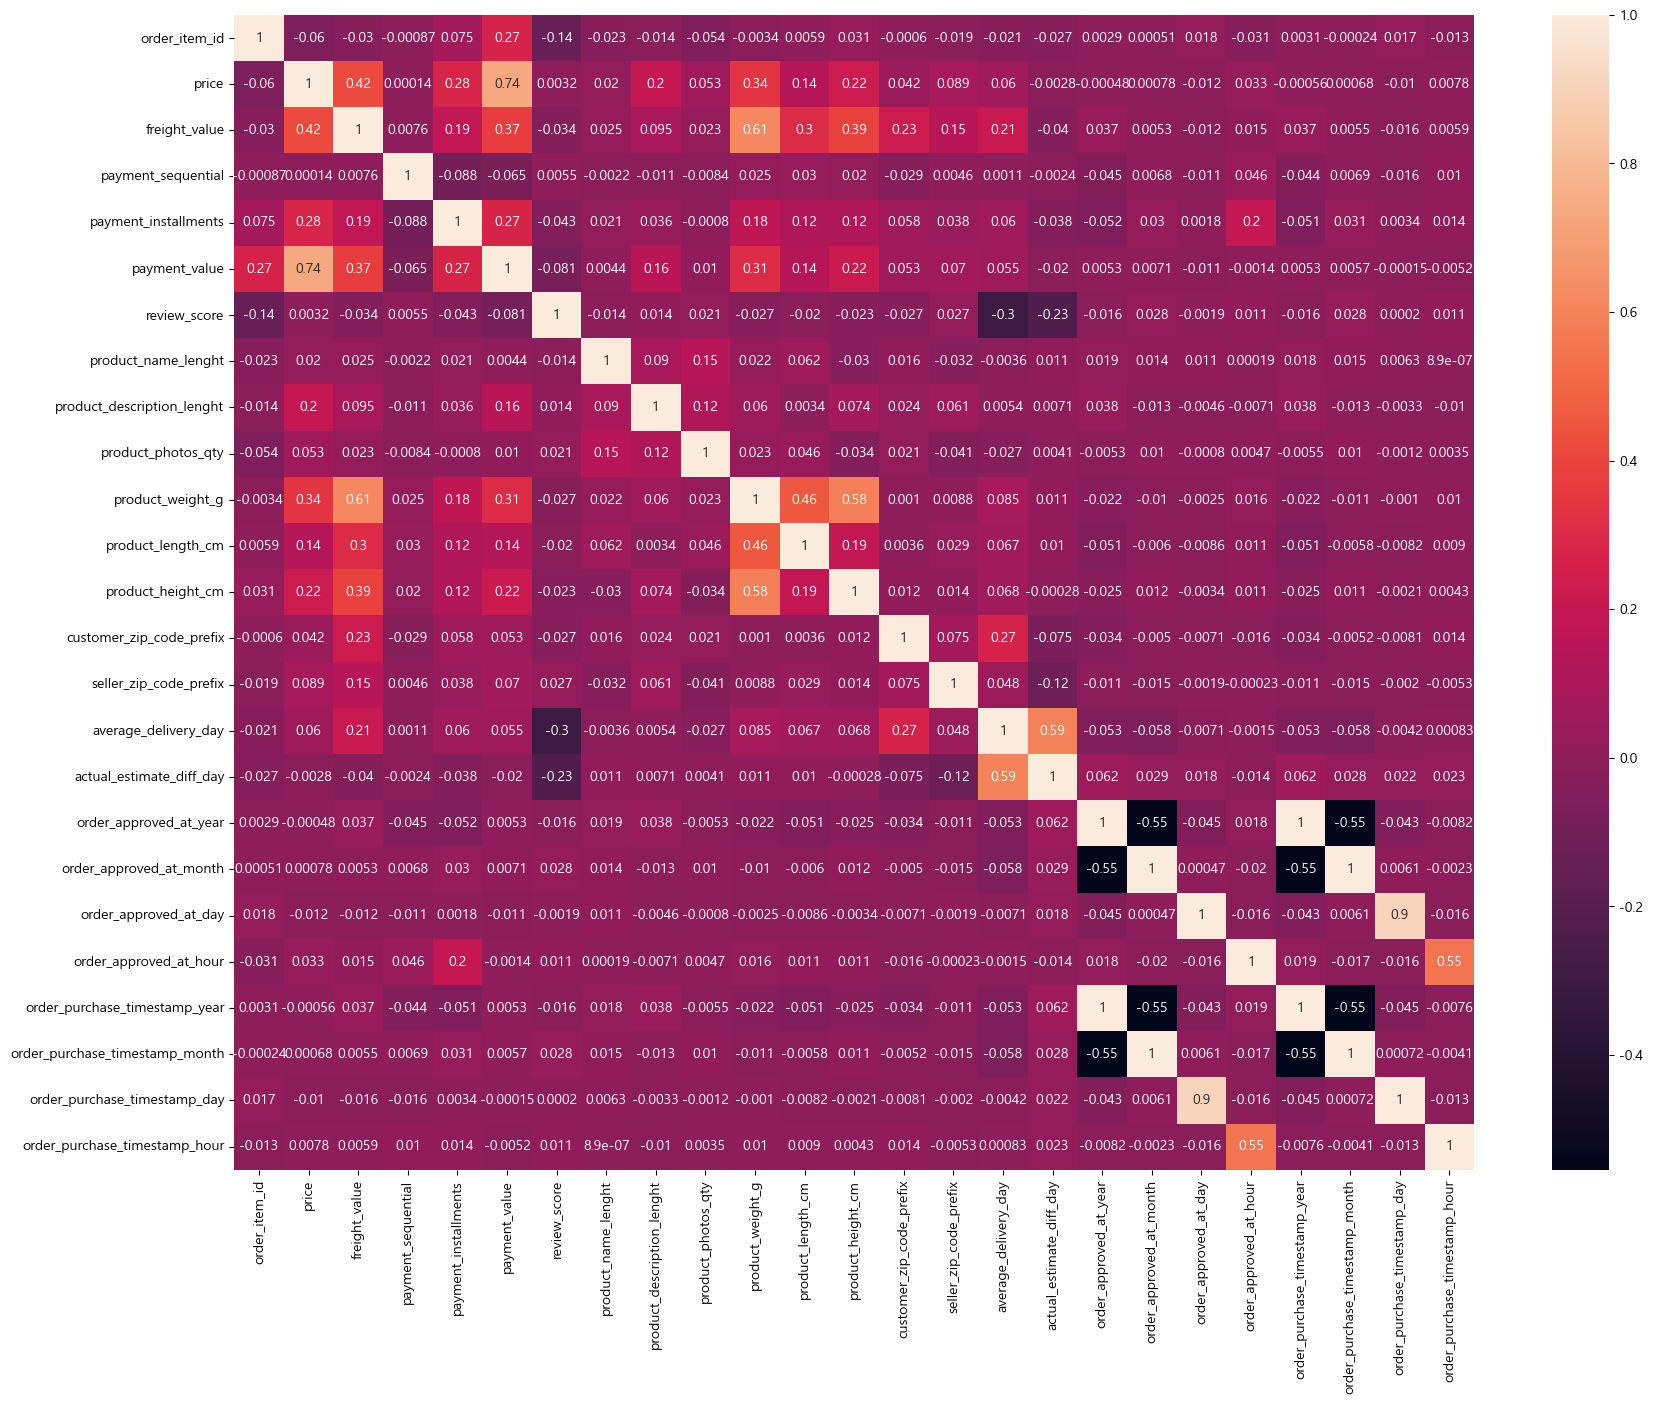

In [45]:
plt.figure(figsize = (20,15))
sns.heatmap(data=df.corr(), annot= True)
plt.show()

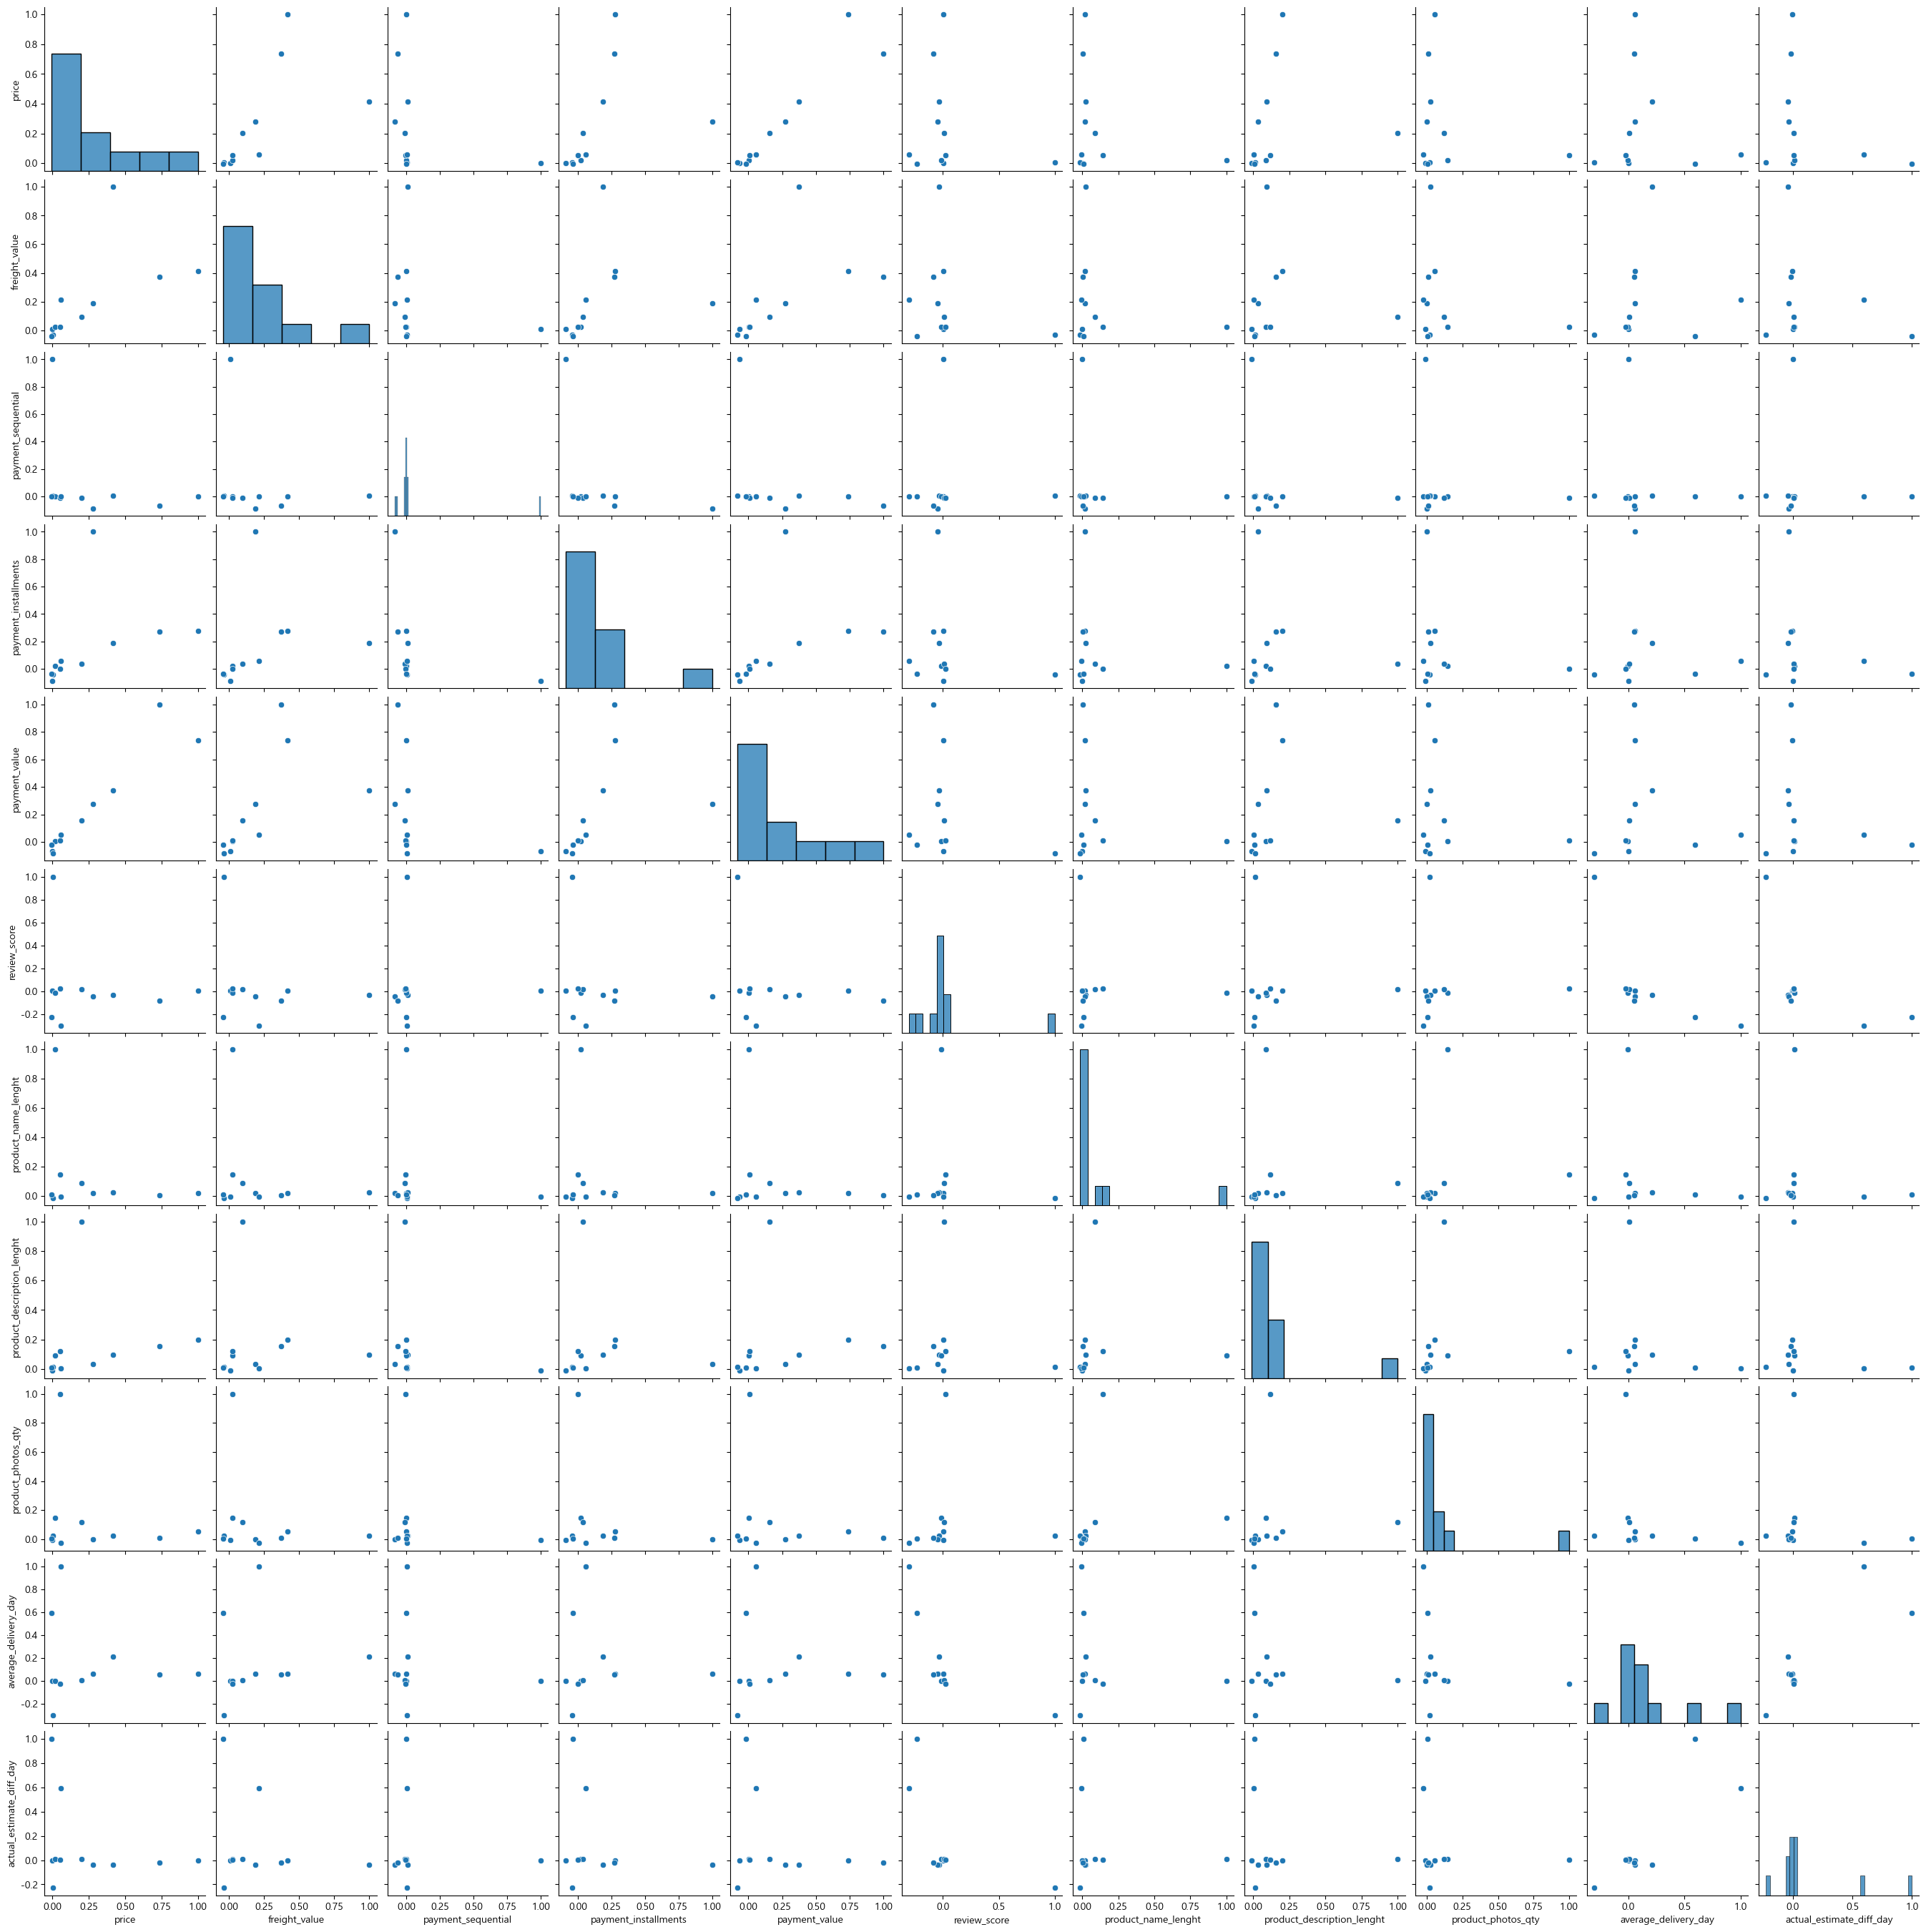

In [50]:
# 확인하고자 하는 11개 컬럼에 대한 pairplot 확인
sns.pairplot(df[corr_check].corr())

# 결제 관련 EDA

- 구매 시간대 관련 - 연도, 월, 일, 시간대
- 결제 승인 시간 + a
- payment

In [8]:
df['order_approved_at_weekday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 114035 entries, 0 to 114034
Series name: order_approved_at_weekday
Non-Null Count   Dtype 
--------------   ----- 
114035 non-null  object
dtypes: object(1)
memory usage: 891.0+ KB


In [3]:
# dtype datetime으로 변경

date_col = ['review_creation_date', 'review_answer_timestamp' ]

for i in date_col :
    df[f'{i}'] = pd.to_datetime( df[f'{i}'] )

order_purchase_timestamp으로 결제 관련 시간대 확인

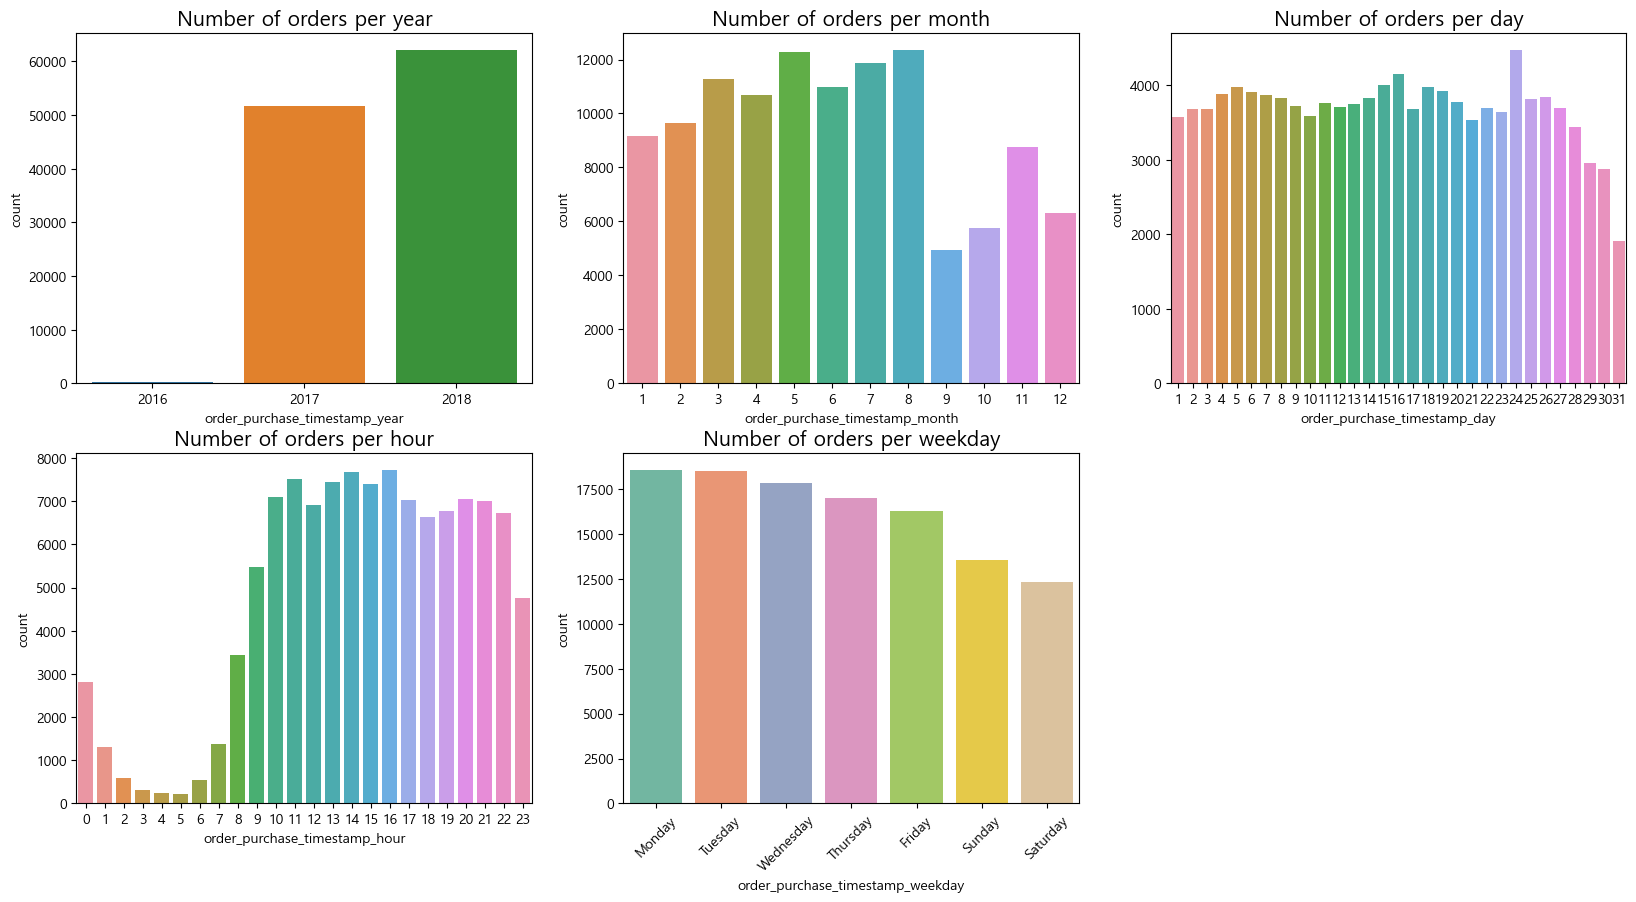

In [11]:
# order_purchase_timestamp으로 결제 관련 시간대 확인 (거래 건수 확인)

plt.figure(figsize = (20, 10))

plt.subplot(231)
sns.countplot(data=df, x='order_purchase_timestamp_year')
plt.title('Number of orders per year', fontsize = 15)

plt.subplot(232)
sns.countplot(data=df, x='order_purchase_timestamp_month')
plt.title('Number of orders per month', fontsize = 15)

plt.subplot(233)
sns.countplot(data=df, x='order_purchase_timestamp_day')
plt.title('Number of orders per day', fontsize = 15)

plt.subplot(234)
sns.countplot(data=df, x='order_purchase_timestamp_hour')
plt.title('Number of orders per hour', fontsize = 15)

plt.subplot(235)
sns.countplot(data=df, x='order_purchase_timestamp_weekday', palette='Set2')
plt.title('Number of orders per weekday', fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

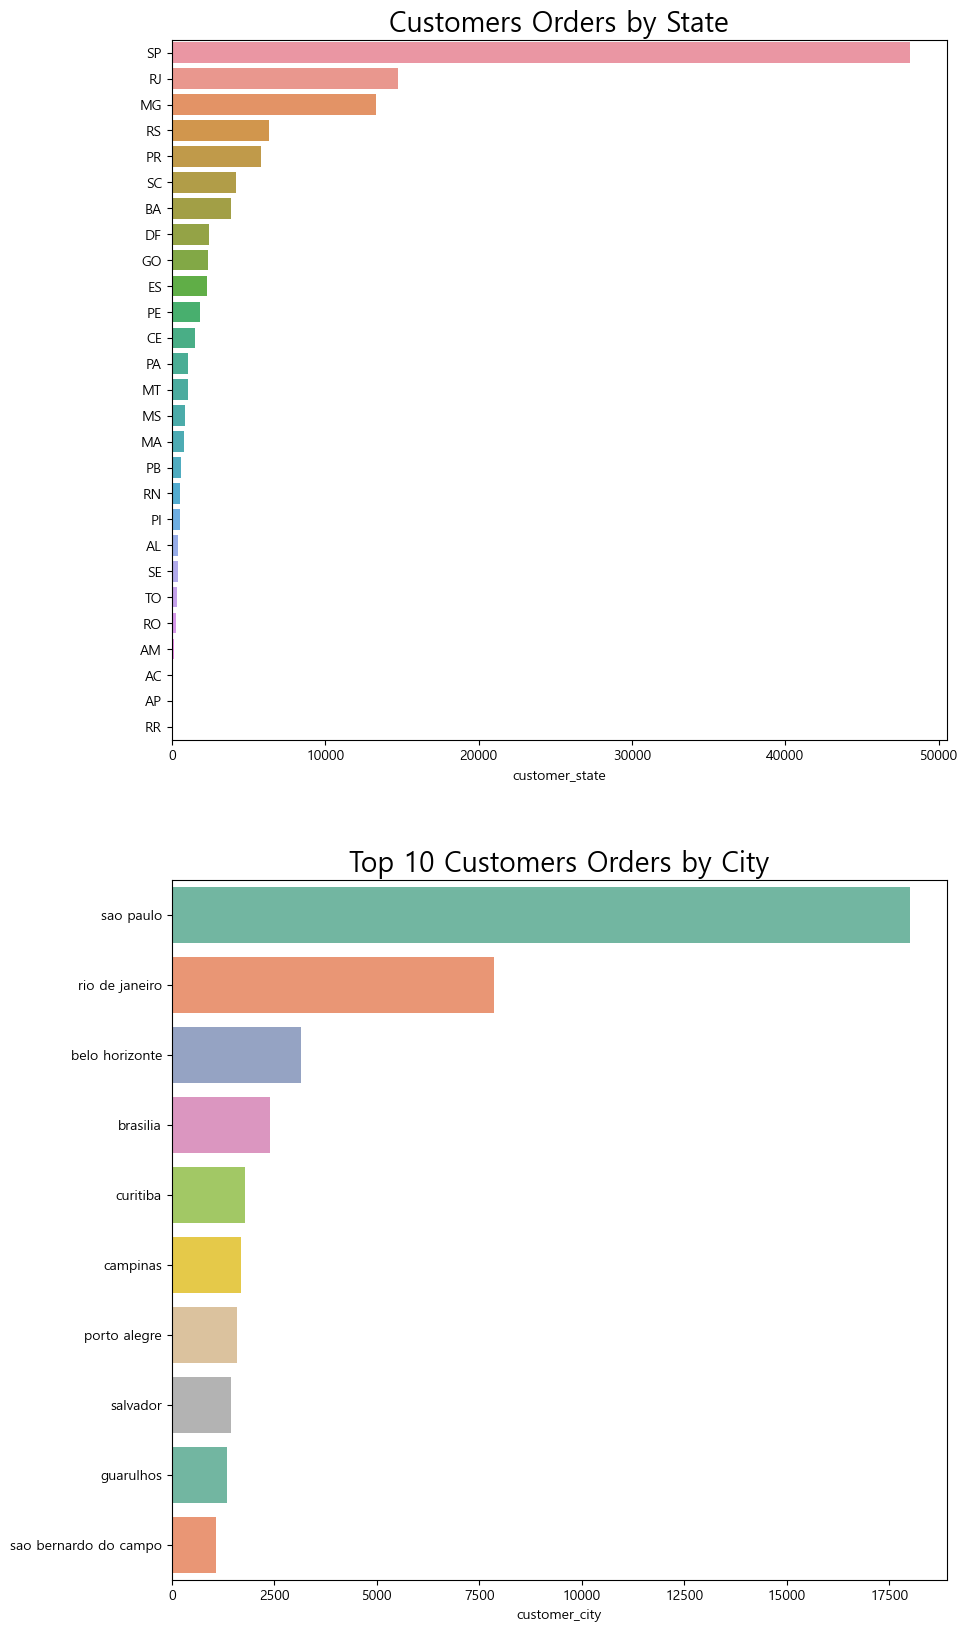

In [38]:
a = df.customer_state.value_counts().to_frame()
b = df.customer_city.value_counts()[:10].to_frame()

plt.figure(figsize = (10, 20))
plt.subplot(211)
sns.barplot(data= a, x = 'customer_state', y=a.index)
plt.title('Customers Orders by State',fontsize = 20)

plt.subplot(212)
sns.barplot(data= b, x = 'customer_city', y=b.index, palette= 'Set2')
plt.title('Top 10 Customers Orders by City',fontsize = 20)

plt.show()

## 지도 관련 EDA

브라질 우편번호는 8자리
표준 형식은 xxxxx-xxx
앞에서부터 5글자 : 지역, 하위 지역, 섹터, 하위 섹터, 하위 섹터 분할기



In [4]:
geo = pd.read_csv('../Data_e-commerce/olist_geolocation_dataset.csv', dtype={'geolocation_zip_code_prefix': str})

# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]
geo.head(3)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   

  geolocation_city geolocation_state geolocation_zip_code_prefix_1_digits  \
0        sao paulo                SP                                    0   
1        sao paulo                SP                                    0   
2        sao paulo                SP                                    0   

  geolocation_zip_code_prefix_2_digits geolocation_zip_code_prefix_3_digits  \
0                                   01                                  010   
1                                   01                                  010   
2                                   01                                  010   

  geolocation_zip_code_prefix_4_digits  
0                                 0103  
1                                 0104  
2                                 0104

In [6]:
geo['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

geolocation_zip_code_prefix
count                 19015.000000
mean                     52.598633
std                      72.057907
min                       1.000000
25%                      10.000000
50%                      29.000000
75%                      66.500000
max                    1146.000000

In [7]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [11]:
from datashader.utils import lnglat_to_meters as webm # 위도, 경도 미터(meter)로 변환
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [13]:
# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)

In [16]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

geolocation_zip_code_prefix
count                 1.000121e+06
mean                  3.657332e+04
std                   3.054939e+04
min                   1.001000e+03
25%                   1.107500e+04
50%                   2.653000e+04
75%                   6.350400e+04
max                   9.999000e+04

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
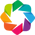

In [15]:
# holoviews : 데이터 분석과 시각화를 원활하고 단순하게 만들기 위해 설계된 오픈 소스 python library
# geoviews : 날씨, 기후 및 원격 감지 연구에 사용되는 지리적, 기상학적, 해양학적 데이터 세트를 쉽게 탐색하고 시각화할 수 있는 python library
# datashader : 대용량 데이터 세트의 의미 있는 표현을 빠르고 유연하게 만들기 위한 그래픽 파이프라인 시스템
# colorcet : Bokeh, Matplotlib, Holoviews, Datashader와 같은 python plotting program에 사용하기 위한 지각적으로 정확한 256색 컬러 맵의 모음

# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [17]:
plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

## 가격 컬럼 EDA

- price, freight_value, payment_value

In [45]:
# 가격 컬럼 상관계수 확인

pri_col = ['price', 'freight_value', 'payment_value']

df[pri_col].corr()

price  freight_value  payment_value
price          1.000000       0.415070       0.736296
freight_value  0.415070       1.000000       0.372414
payment_value  0.736296       0.372414       1.000000

price

Text(0.5, 1.0, 'price(log)')

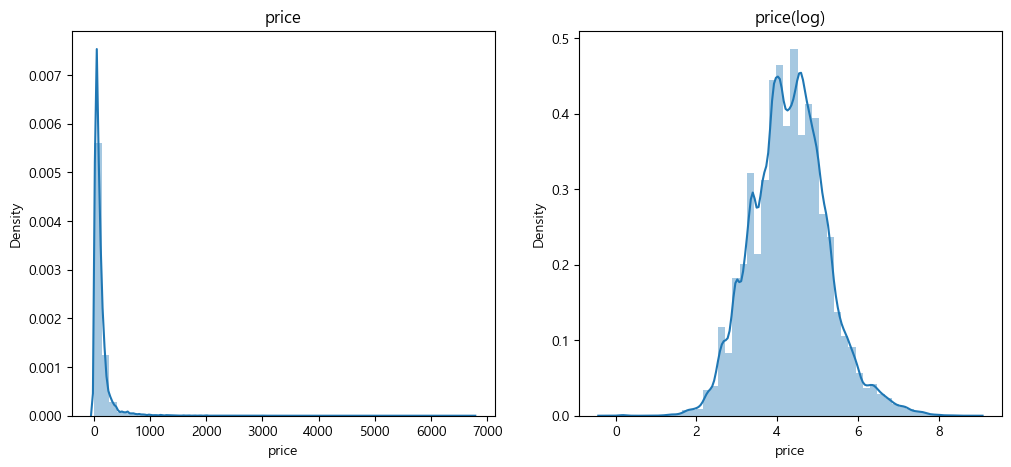

In [31]:
# price distribution 확인

plt.figure(figsize= (12,5))
plt.subplot(121)
sns.distplot(df.price)
plt.title('price')

plt.subplot(122)
sns.distplot(np.log(df.price))
plt.title('price(log)')

# skewness reduction / 대상 변수를 변환하지 않고 왜곡을 감소할 수 있음
# price_log columns 생성하여 EDA 진행

In [58]:
df['price_log'] = np.log(df['price'])

payment_installments  price_log
payment_installments                  1.00       0.34
price_log                             0.34       1.00

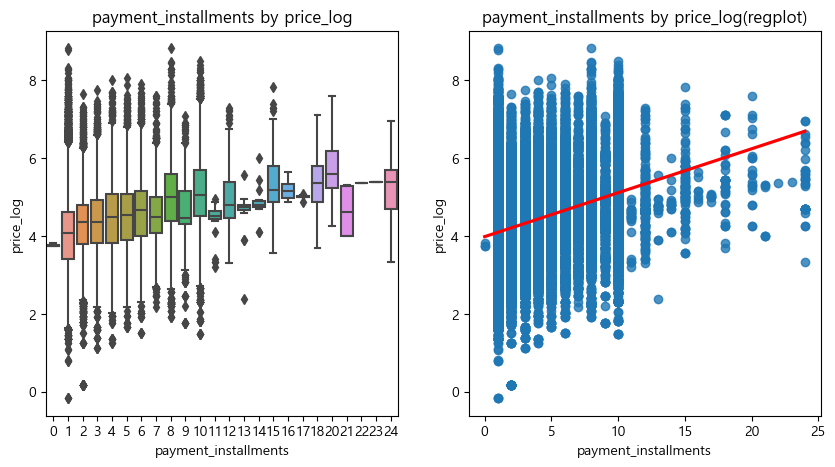

In [61]:
# 가격이 높을수록 할부 기간도 높은지 확인

# 가격(price) 관련 확인 - payment_installments, payment_type

# sns.pairplot(df[['price','payment_installments', 'payment_type']])

df['payment_installments'] = df['payment_installments'].astype(int)

display(df[['payment_installments', 'price_log']].corr())

plt.figure(figsize = (10,5))

plt.subplot(121)
sns.boxplot(data=df, x='payment_installments', y='price_log')
plt.title('payment_installments by price_log')

plt.subplot(122)
sns.regplot(data=df, x='payment_installments', y='price_log', line_kws={'color' : 'red'})
plt.title('payment_installments by price_log(regplot)')

plt.show()

Text(0.5, 1.0, 'Payment type by price_log')

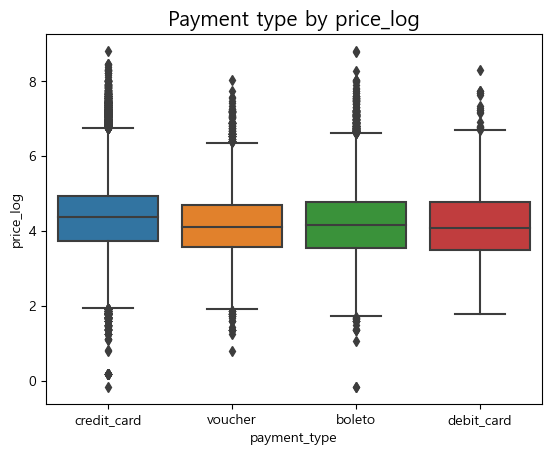

In [43]:
# 결제 방식 별 price_log 확인

sns.boxplot(data=df, x='payment_type', y='price_log')
plt.title('Payment type by price_log', fontsize = 15)

freight_value

In [47]:
min(df.freight_value), max(df.freight_value)

# df1.freight_value = round(df1.freight_value).astype(int)

(0.0, 409.68)

In [304]:
# 화물 비용 / 주문 가격 = 화물 비용의 비율

df['freight_rate'] = df['freight_value'] / df['price']
df['freight_rate']

df[['freight_value', 'price', 'freight_rate']].head(2)
# df1[df1.freight_value == 0].shape[0] / 배송비가 무료인 경우 : 386건

freight_value  price  freight_rate
0           8.72  29.99          0.29
1           8.72  29.99          0.29

Text(0.5, 1.0, 'product_category when the freight_rate exceeds 1')

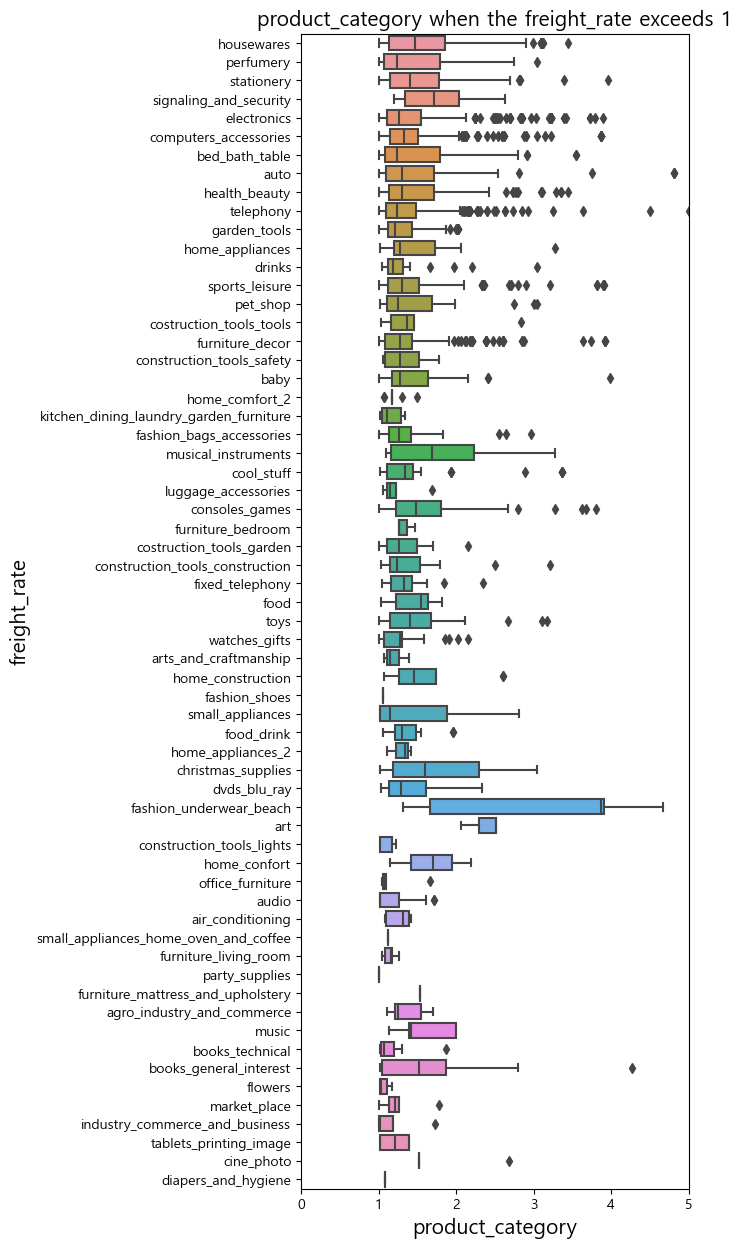

In [332]:
# 화물 (배송) 가격이 상품 가격보다 높은 경우의 freight_rate boxplot 확인

df[df.freight_rate > 1]['product_category'].nunique() # category : 62가지

a = df[df.freight_rate > 1][['product_category', 'freight_value', 'price', 'freight_rate']]

plt.figure(figsize = (5,15))
sns.boxplot(data=a, y='product_category', x='freight_rate')
plt.xlim(0,5)
plt.xlabel('product_category', fontsize = 15)
plt.ylabel('freight_rate', fontsize = 15)
plt.title('product_category when the freight_rate exceeds 1', fontsize = 15)

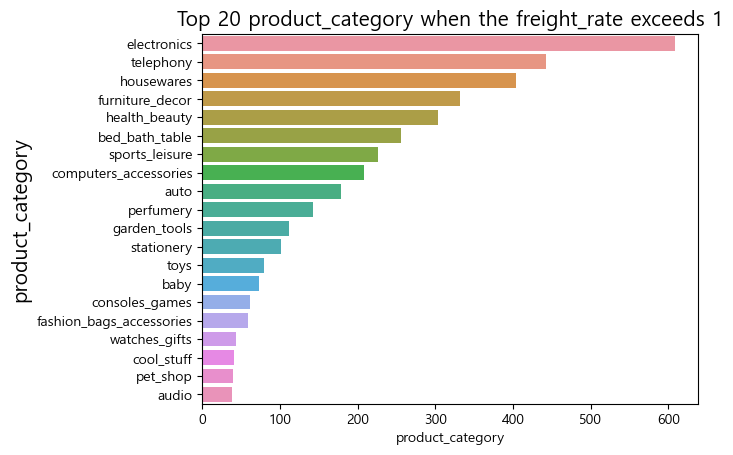

In [331]:
# 화물 (배송) 가격이 상품 가격보다 높은 경우의 Top 20 product_category
c = df[df.freight_rate > 1]['product_category'].value_counts()[:20].to_frame()
 
sns.barplot(data=c, y=c.index, x='product_category')
plt.ylabel('product_category', fontsize = 15)
plt.title('Top 20 product_category when the freight_rate exceeds 1', fontsize = 15)
plt.show()


fig = px.pie(c, names = c.index, values = 'product_category')
fig.update_layout(title_text='Top 20 product_category when the freight_rate exceeds 1', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

Seller - price, freight_value

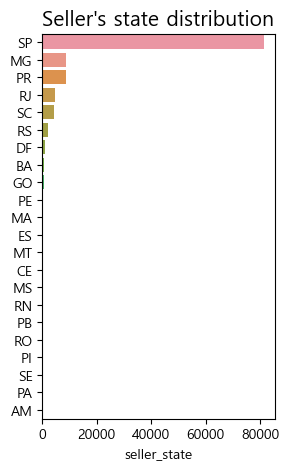

In [282]:
a = df.seller_state.value_counts().to_frame()

plt.figure(figsize = (3,5))
# plt.subplot(211)
sns.barplot(data= a, x = 'seller_state', y=a.index)
plt.title("Seller's state distribution",fontsize = 15)

plt.show()

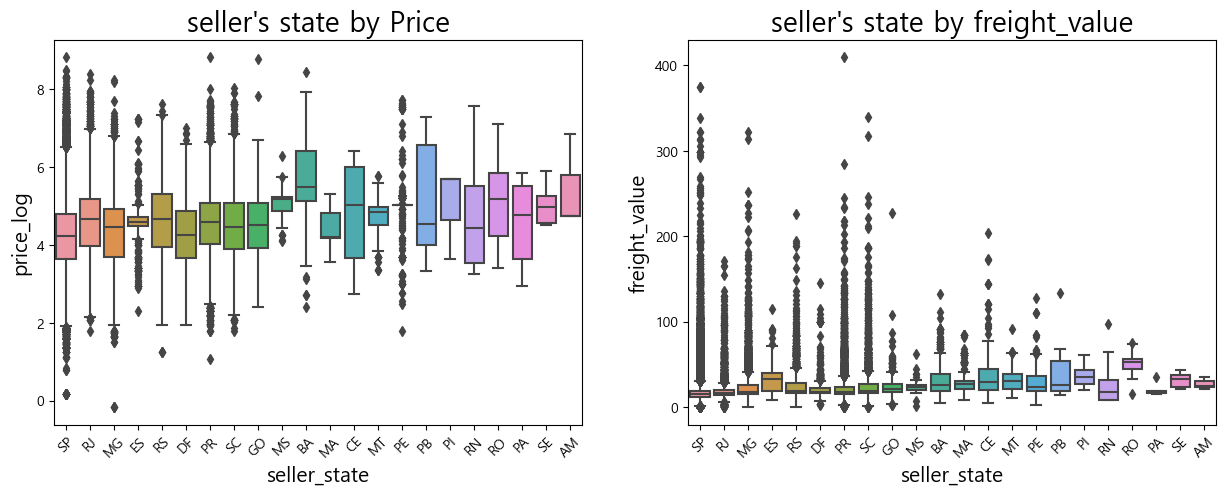

In [37]:
# 주별 가격대 및 화물 가격 확인

plt.figure(figsize =(15,5))

plt.subplot(121)
sns.boxplot(data=df, x='seller_state', y='price_log')
plt.xlabel('seller_state', fontsize = 15)
plt.ylabel('price_log', fontsize = 15)
plt.xticks(rotation = 45)
plt.title("seller's state by Price", fontsize = 20)

plt.subplot(122)
sns.boxplot(data=df, x='seller_state', y='freight_value')
plt.xlabel('seller_state', fontsize = 15)
plt.ylabel('freight_value', fontsize = 15)
plt.xticks(rotation = 45)
plt.title("seller's state by freight_value", fontsize = 20)

plt.show()

# 매출 관련 컬럼 EDA

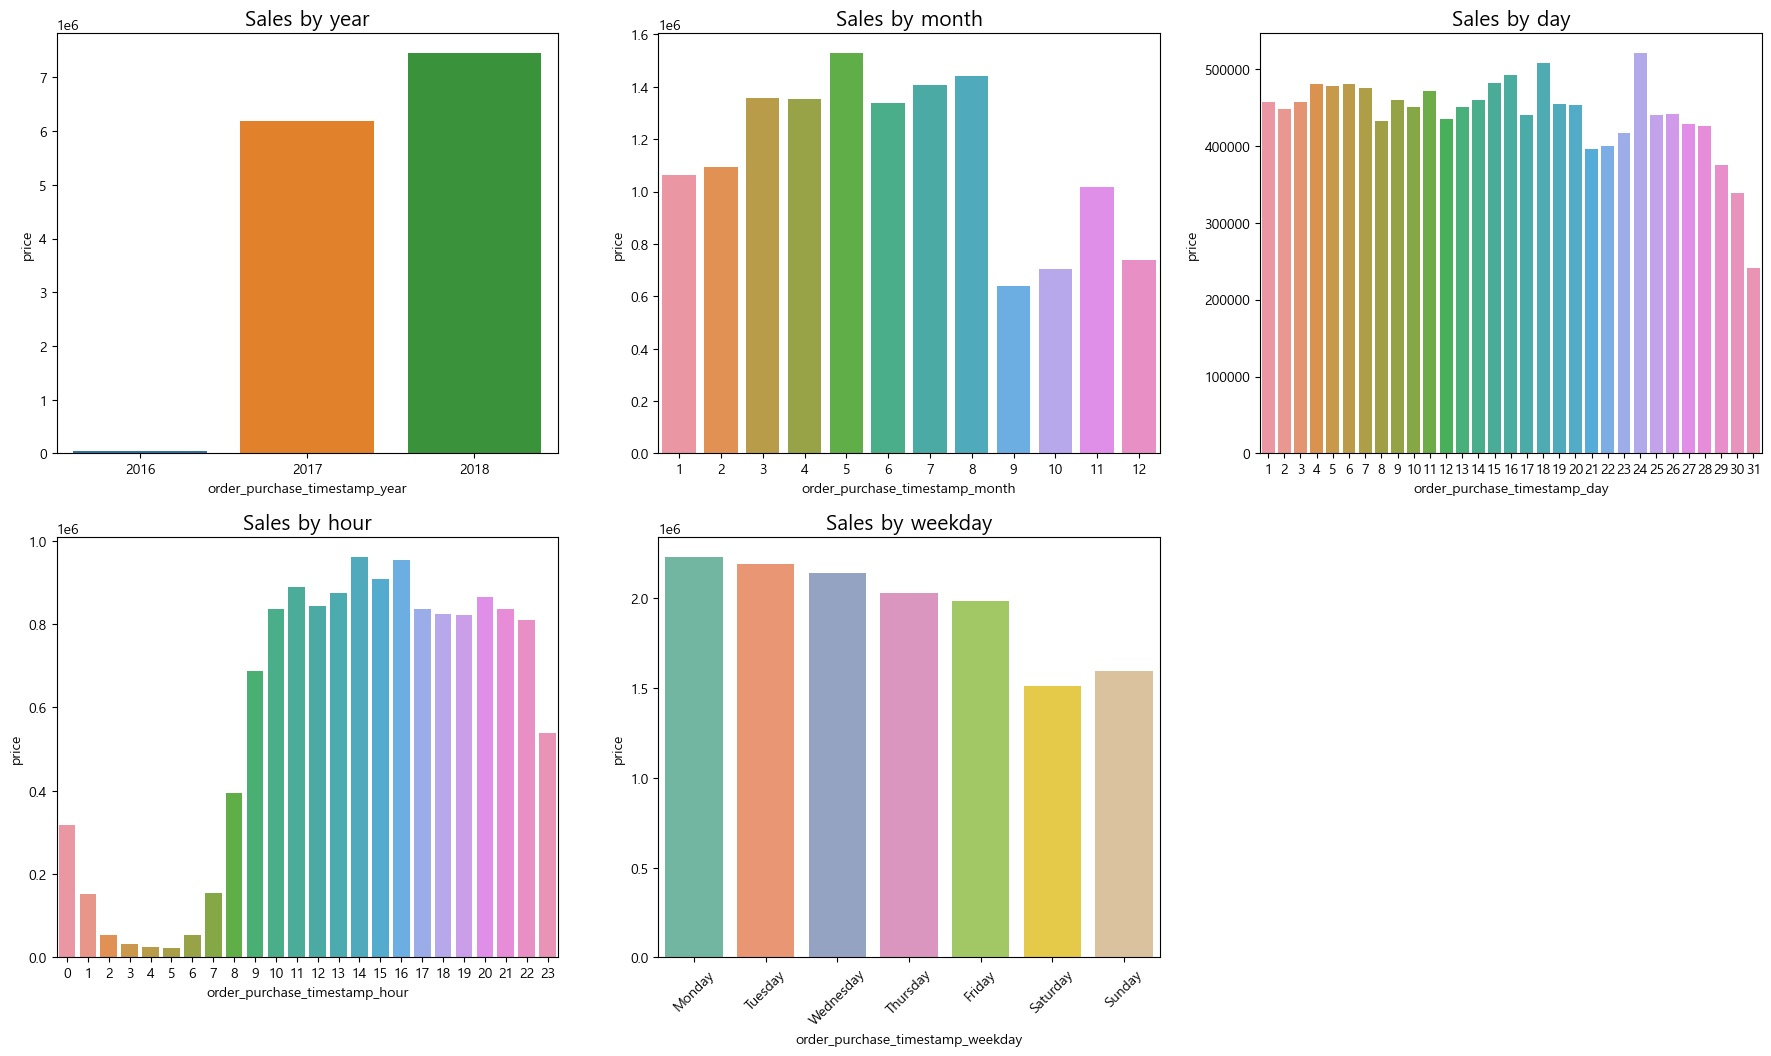

In [29]:
pd.options.display.float_format = '{:.2f}'.format

a = df.groupby('order_purchase_timestamp_year')['price'].sum().to_frame()
b = df.groupby('order_purchase_timestamp_month')['price'].sum().to_frame()
c = df.groupby('order_purchase_timestamp_day')['price'].sum().to_frame()
d = df.groupby('order_purchase_timestamp_hour')['price'].sum().to_frame()
e = df.groupby('order_purchase_timestamp_weekday')['price'].sum().to_frame()

plt.figure(figsize = (22, 12))

plt.subplot(231)
sns.barplot(data=a, x=a.index, y='price')
plt.title('Sales by year', fontsize = 15)

plt.subplot(232)
sns.barplot(data=b, x=b.index, y='price')
plt.title('Sales by month', fontsize = 15)

plt.subplot(233)
sns.barplot(data=c, x=c.index, y='price')
plt.title('Sales by day', fontsize = 15)

plt.subplot(234)
sns.barplot(data=d, x=d.index, y='price')
plt.title('Sales by hour', fontsize = 15)

plt.subplot(235)
sns.barplot(data=e, x=e.index, y='price', palette='Set2', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales by weekday', fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

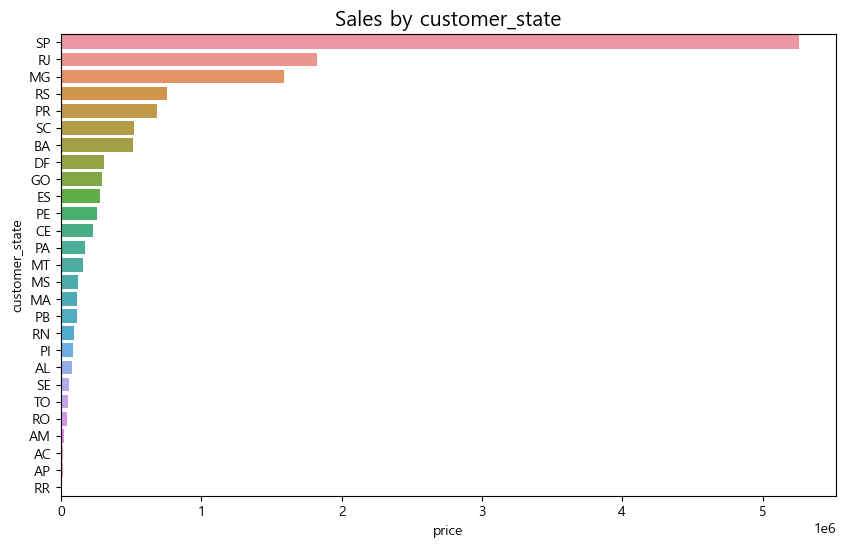

In [307]:
# 고객 주별 매출 확인

a = df.groupby('customer_state')['price'].sum().sort_values(ascending=False).to_frame()

plt.figure(figsize = (10,6))
sns.barplot(data = a, y=a.index, x='price')
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Sales by customer_state', fontsize = 15)

plt.show()

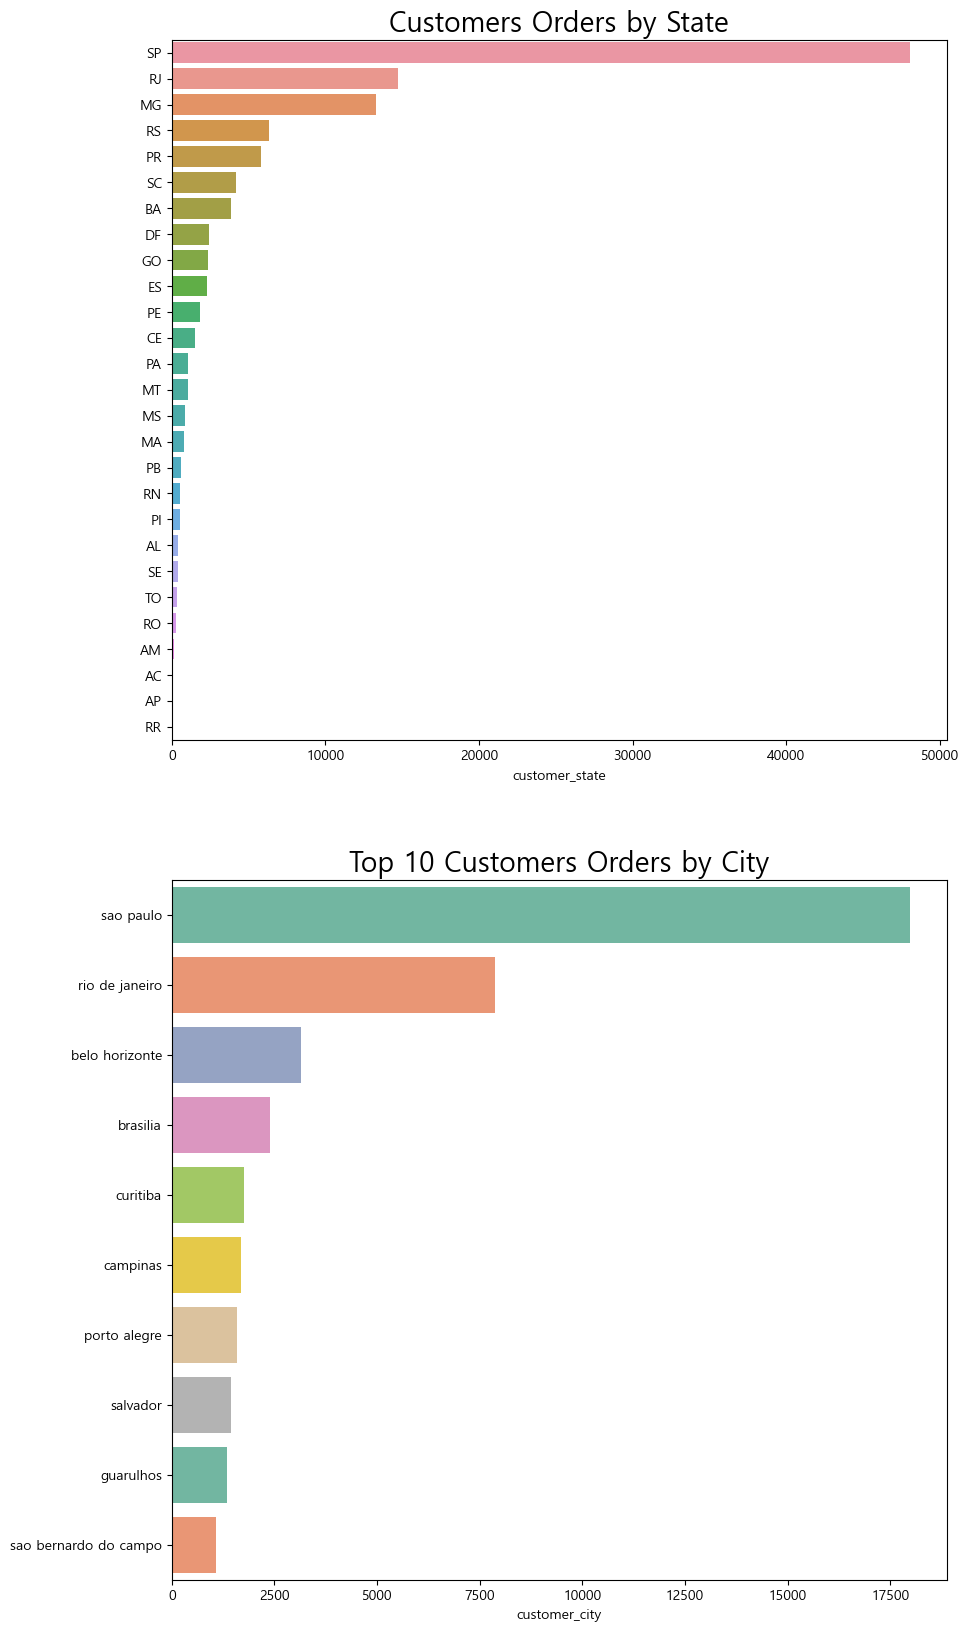

In [308]:
a = df.customer_state.value_counts().to_frame()
b = df.customer_city.value_counts()[:10].to_frame()

plt.figure(figsize = (10, 20))
plt.subplot(211)
sns.barplot(data= a, x = 'customer_state', y=a.index)
plt.title('Customers Orders by State',fontsize = 20)

plt.subplot(212)
sns.barplot(data= b, x = 'customer_city', y=b.index, palette= 'Set2')
plt.title('Top 10 Customers Orders by City',fontsize = 20)

plt.show()

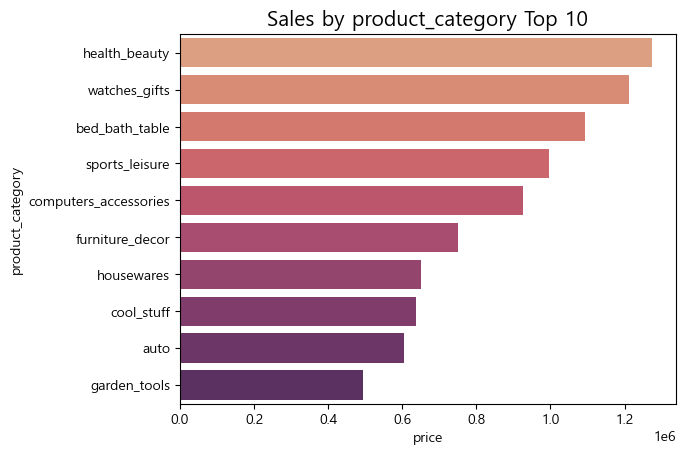

In [310]:
# 카테고리별 매출 순위

a = df.groupby('product_category')['price'].sum().sort_values(ascending=False)[:10].to_frame()

# plt.figure(figsize = (10,8))
sns.barplot(data = a, x='price', y=a.index, palette = 'flare')
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Sales by product_category Top 10', fontsize = 15)
# plt.xticks(rotation = 90)
plt.show()

## 매출 관련 궁금한 것

In [311]:
def sales(col) :
    a = df.groupby(col)['price'].sum()
    return a

In [312]:
# 그룹화하여 description_length2 컬럼 추가
def func(x) :
  if (0<=x) & (x<500) :
    return "0~500"
  elif (500<=x) & (x<1000) :
    return "500~1000"
  elif (1000<=x) & (x<1500) :
    return "1000~1500"
  elif (1500<=x) & (x<2000) :
    return "1500~2000"
  else :
    return "2000~"

df['product_description_lenght2'] = df['product_description_lenght'].apply(func)

price  product_description_lenght
price                        1.00                        0.77
product_description_lenght   0.77                        1.00

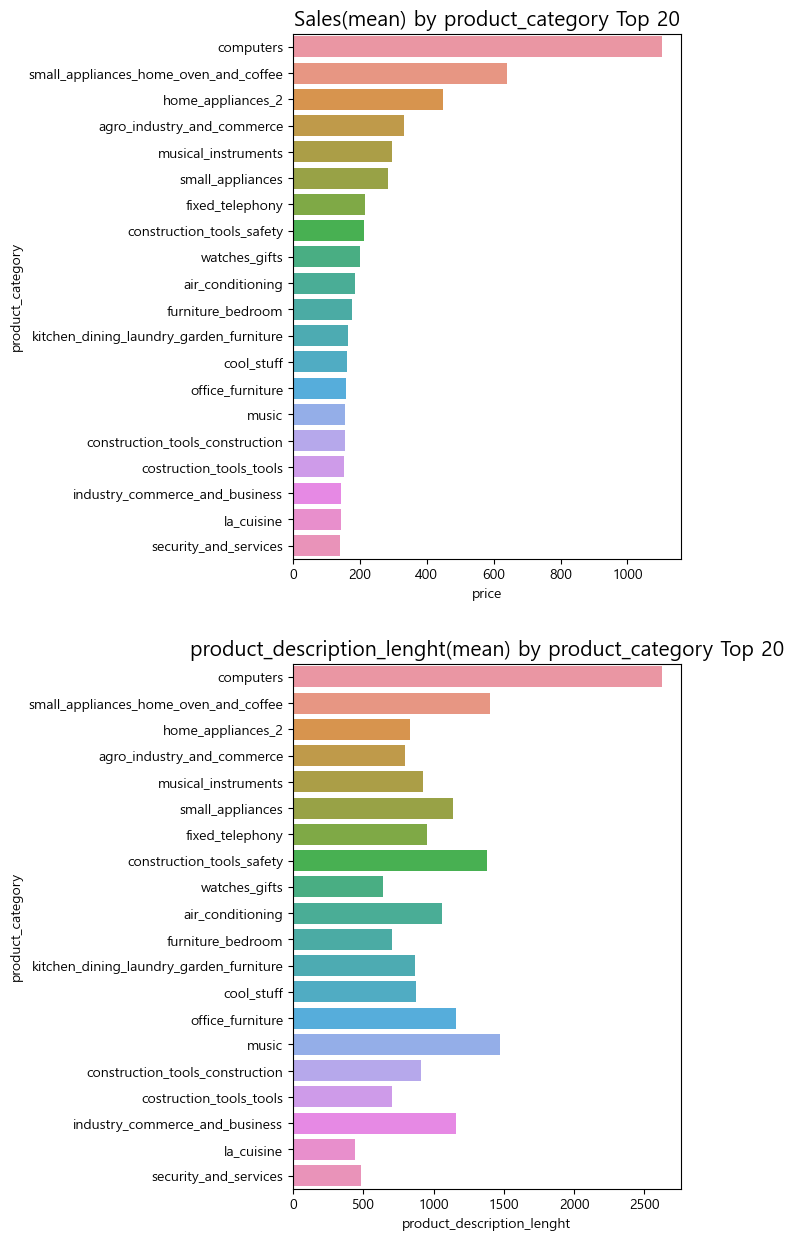

In [313]:
# 가격대가 높은 제품일수록 제품 설명이 자세한지 확인 

# df.groupby('product_category')[['price', 'product_description_lenght']].mean().sort_values('price', ascending=False)[:20]
a = df.groupby('product_category')[['price', 'product_description_lenght']].mean().sort_values('price', ascending=False)[:20]

display(a.corr())

plt.figure(figsize = (5,15))

plt.subplot(211)
sns.barplot(data=a, y=a.index, x='price')
plt.title('Sales(mean) by product_category Top 20', fontsize = 15)

plt.subplot(212)
sns.barplot(data=a, y=a.index, x='product_description_lenght')
plt.title('product_description_lenght(mean) by product_category Top 20', fontsize = 15)
plt.show()

# 가격대가 높은 제품일수록 제품 설명도 자세한 것을 알 수 있음

0
product_category price     
garden_tools     59.90  698
bed_bath_table   89.90  602
telephony        29.99  540
furniture_decor  69.90  536
garden_tools     49.90  496

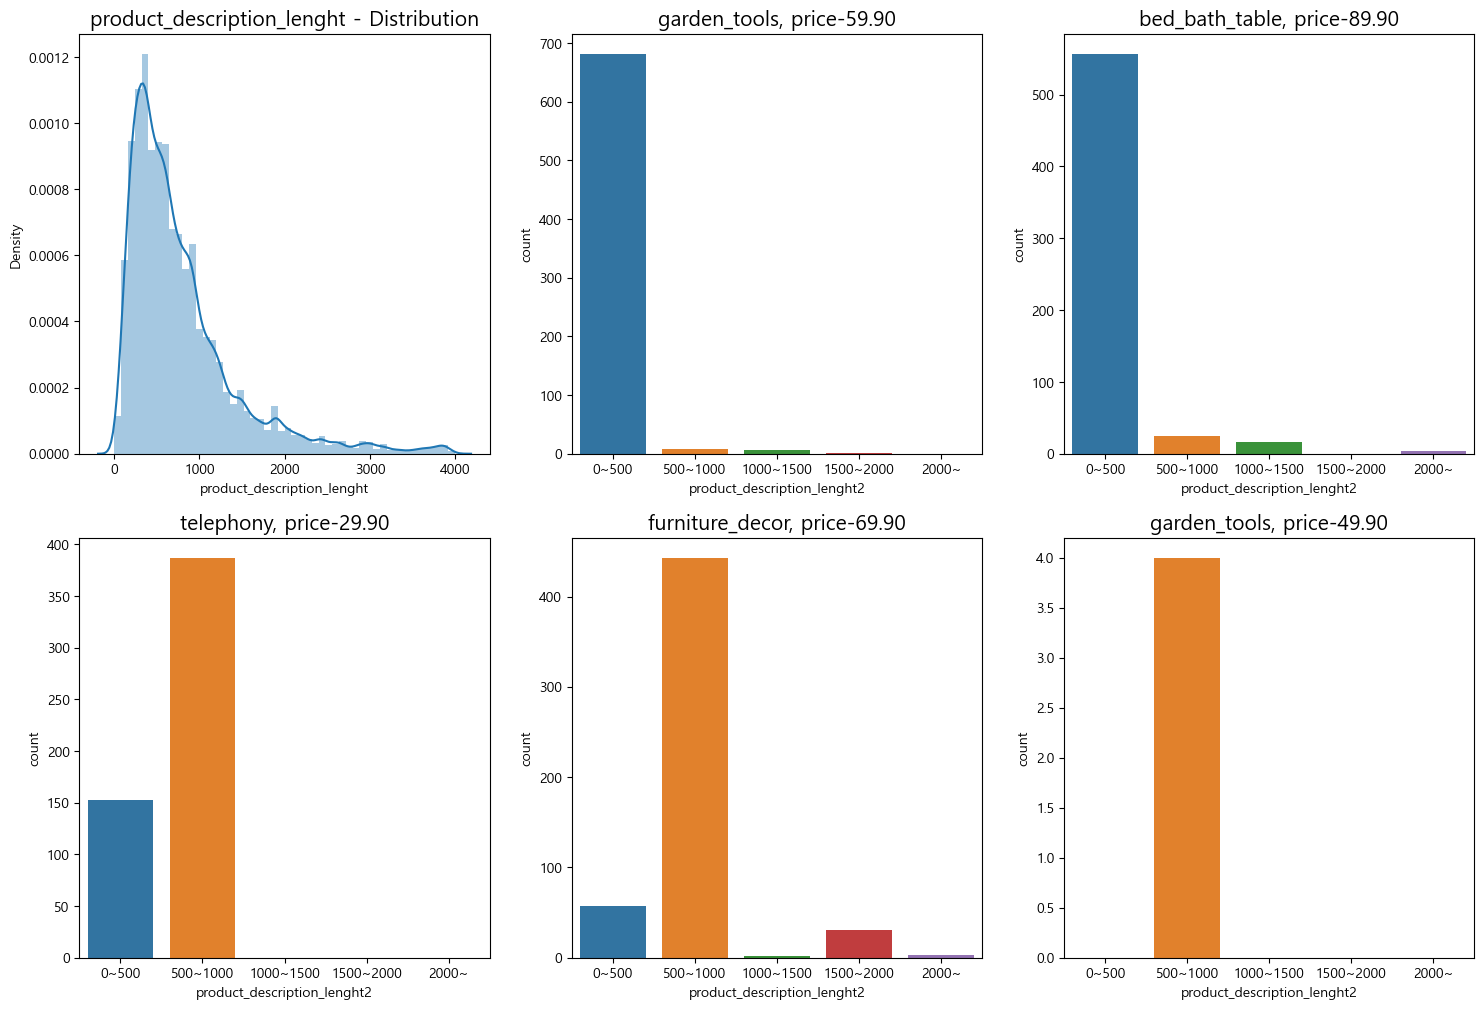

In [314]:
# 상품에 대한 자세한 설명이 매출에 도움이 되는가?
# 1. 상품 설명과 매출의 연관성 확인 : 제품 설명에 따른 구매 건수 확인 (같은 카테고리, 같은 가격대에서 분포 확인)

display(df[['product_category', 'price']].value_counts()[:5].to_frame())

a = df[(df.product_category == 'garden_tools') & (df.price == 59.90)]
b = df[(df.product_category == 'bed_bath_table') & (df.price == 89.90)]
c = df[(df.product_category == 'telephony') & (df.price == 29.99)]
d = df[(df.product_category == 'furniture_decor') & (df.price == 69.90)]
e = df[(df.product_category == 'garden_tools') & (df.price == 9.90)]

plt.figure(figsize = (18,12))

plt.subplot(231)
sns.distplot(df['product_description_lenght'])
plt.title('product_description_lenght - Distribution', fontsize = 15)

plt.subplot(232)
sns.countplot(data= a, x='product_description_lenght2', order = ['0~500', '500~1000', '1000~1500', '1500~2000', '2000~'])
plt.title('garden_tools, price-59.90', fontsize = 15)

plt.subplot(233)
sns.countplot(data= b, x='product_description_lenght2', order = ['0~500', '500~1000', '1000~1500', '1500~2000', '2000~'])
plt.title('bed_bath_table, price-89.90', fontsize = 15)

plt.subplot(234)
sns.countplot(data= c, x='product_description_lenght2', order = ['0~500', '500~1000', '1000~1500', '1500~2000', '2000~'])
plt.title('telephony, price-29.90', fontsize = 15)

plt.subplot(235)
sns.countplot(data= d, x='product_description_lenght2', order = ['0~500', '500~1000', '1000~1500', '1500~2000', '2000~'])
plt.title('furniture_decor, price-69.90', fontsize = 15)

plt.subplot(236)
sns.countplot(data= e, x='product_description_lenght2', order = ['0~500', '500~1000', '1000~1500', '1500~2000', '2000~'])
plt.title('garden_tools, price-49.90', fontsize = 15)

plt.show()

# 제품 설명을 많이 쓰는 것은 구매 건수 향상 즉, 매출 향상에 도움이 되지 않음, 소비자들이 간단하게 중요한 제품 설명하는 것을 선호한다는 것을 확인
# 1000자 이내의 설명을 쓰는 것을 권장

In [315]:
df.product_photos_qty = df.product_photos_qty.astype(int)

0
product_category price     
garden_tools     59.90  698
bed_bath_table   89.90  602
telephony        29.99  540
furniture_decor  69.90  536
garden_tools     49.90  496

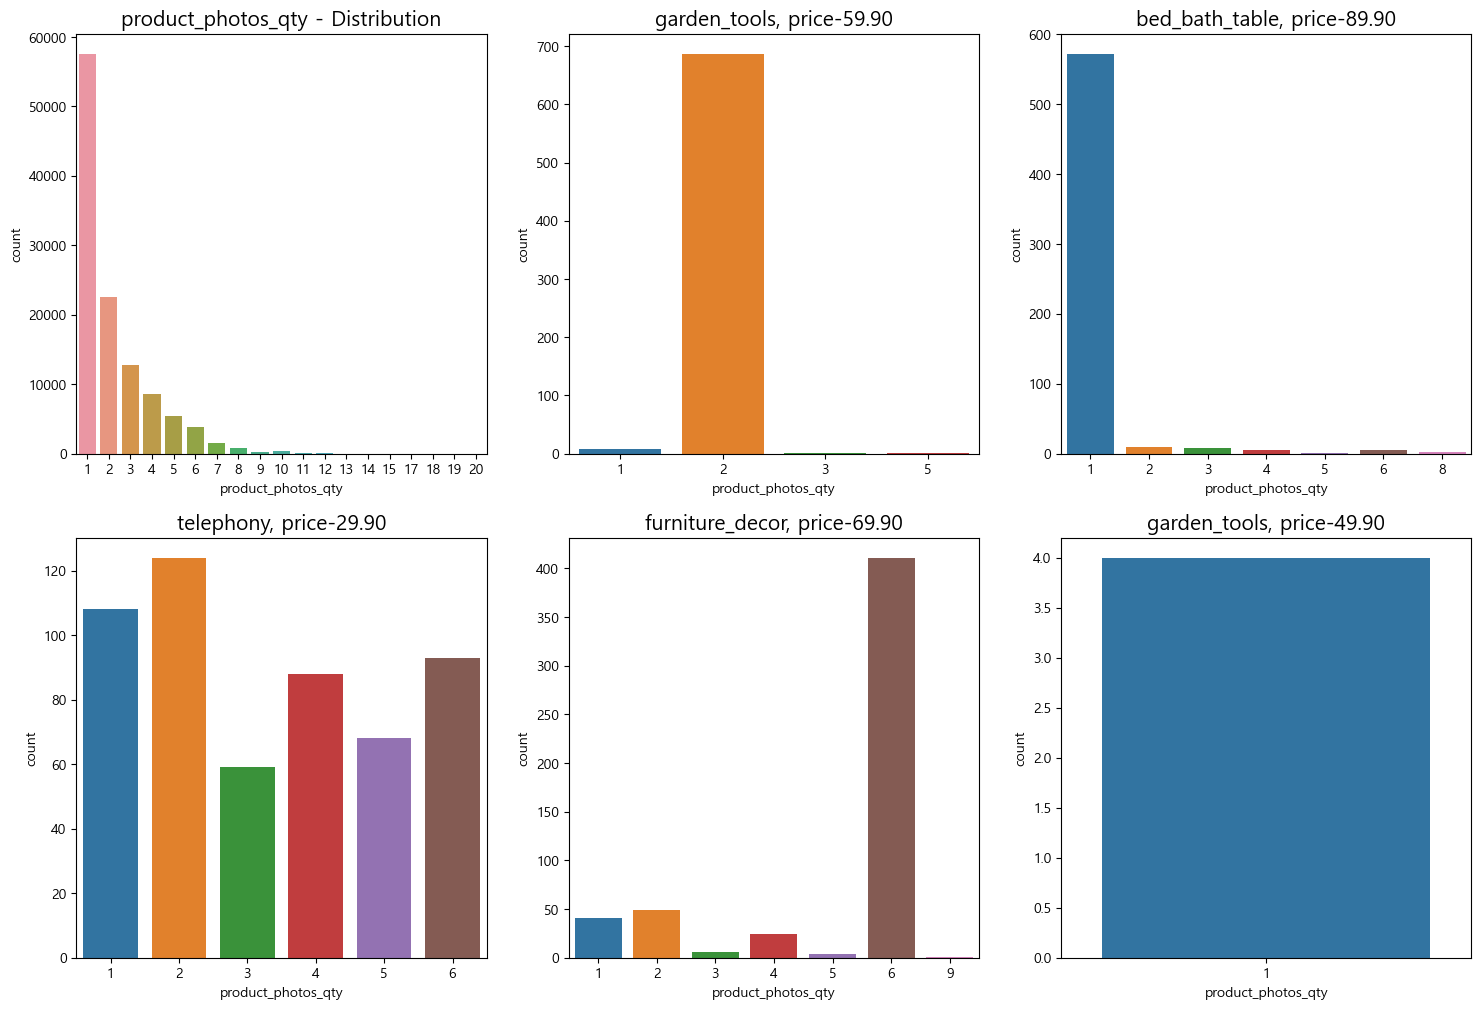

In [316]:
# 상품에 대한 자세한 설명이 매출에 도움이 되는가?
# 2. 제품 사진과 매출의 연관성 확인 : 제품 사진 수에 따른 구매 건수 확인 (같은 카테고리, 같은 가격대에서 분포 확인)

display(df[['product_category', 'price']].value_counts()[:5].to_frame())

a = df[(df.product_category == 'garden_tools') & (df.price == 59.90)]
b = df[(df.product_category == 'bed_bath_table') & (df.price == 89.90)]
c = df[(df.product_category == 'telephony') & (df.price == 29.99)]
d = df[(df.product_category == 'furniture_decor') & (df.price == 69.90)]
e = df[(df.product_category == 'garden_tools') & (df.price == 9.90)]

plt.figure(figsize = (18,12))

plt.subplot(231)
sns.countplot(data= df, x = 'product_photos_qty')
plt.title('product_photos_qty - Distribution', fontsize = 15)

plt.subplot(232)
sns.countplot(data= a, x='product_photos_qty')
plt.title('garden_tools, price-59.90', fontsize = 15)

plt.subplot(233)
sns.countplot(data= b, x='product_photos_qty')
plt.title('bed_bath_table, price-89.90', fontsize = 15)

plt.subplot(234)
sns.countplot(data= c, x='product_photos_qty')
plt.title('telephony, price-29.90', fontsize = 15)

plt.subplot(235)
sns.countplot(data= d, x='product_photos_qty')
plt.title('furniture_decor, price-69.90', fontsize = 15)

plt.subplot(236)
sns.countplot(data= e, x='product_photos_qty')
plt.title('garden_tools, price-49.90', fontsize = 15)

plt.show()

# 제품 설명을 많이 쓰는 것은 구매 건수 향상 즉, 매출 향상에 도움이 되지 않음, 소비자들이 간단하게 중요한 제품 설명하는 것을 선호한다는 것을 확인
# 1000자 이내의 설명을 쓰는 것을 권장

In [318]:
# 판매가가 높은 제품일수록 상품에 대한 자세한 설명이 매출에 도움이 되는가?
# 2. 평균 판매가가 높은 제품 사진과 매출의 연관성 확인 : 제품 사진 수에 따른 구매 건수 확인 (같은 카테고리, 같은 가격대에서 분포 확인)

display(df.groupby('product_category')['price'].mean().sort_values(ascending=False)[:5].to_frame())

# plt.figure(figsize = (18,12))

# plt.subplot(231)
# sns.countplot(data=df, x='product_photos_qty')
# plt.title('product_photos_qty - Distribution', fontsize = 15) 

# plt.subplot(232)
# sns.countplot(data= df[df.product_category == 'computers'], x = 'product_photos_qty') # 결제 건수 : 216건
# plt.title('computers - product_photos_qty', fontsize = 15)

# plt.subplot(233)
# sns.countplot(data= df[df.product_category == 'small_appliances_home_oven_and_coffee'], x = 'product_photos_qty') # 결제 건수 : 75
# plt.title('small_appliances_home_oven_and_coffee - product_photos_qty', fontsize = 15)

# plt.subplot(234)
# sns.countplot(data= df[df.product_category == 'home_appliances_2'], x = 'product_photos_qty') # 결제 건수 : 263
# plt.title('home_appliances_2 - product_photos_qty', fontsize = 15)

# plt.subplot(235)
# sns.countplot(data= df[df.product_category == 'agro_industry_and_commerce'], x = 'product_photos_qty') # 결제 건수 : 246
# plt.title('agro_industry_and_commerce - product_photos_qty', fontsize = 15)

# plt.subplot(236)
# sns.countplot(data= df[df.product_category == 'musical_instruments'], x = 'product_photos_qty') # 결제 건수 : 689
# plt.title('musical_instruments - product_photos_qty', fontsize = 15)

# plt.show()

# 평균 판매가가 높은 제품의 경우 제품 게시 사진수가 

price
product_category                             
computers                             1104.32
small_appliances_home_oven_and_coffee  641.19
home_appliances_2                      449.31
agro_industry_and_commerce             332.84
musical_instruments                    295.71

In [319]:
# 평균 배송일이 음수인 경우 이상치라 판단 -> drop하고 진행
df[df['average_delivery_day'] < 0].shape # 73건
df = df.drop(df[df['average_delivery_day'] < 0].index)

In [320]:
df.product_category.value_counts()

bed_bath_table               11809
health_beauty                 9803
sports_leisure                8784
furniture_decor               8628
computers_accessories         7960
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Name: product_category, Length: 71, dtype: int64

In [321]:
df[df.product_category == 'bed_bath_table'].groupby('average_delivery_day')['price'].sum().index.shape

(76,)

Average delivery date of 'bed_bath_table' sales Top 20 : 10.55 day
Average delivery date of 'bed_bath_table' sales Bottom 20 : 78.3 day


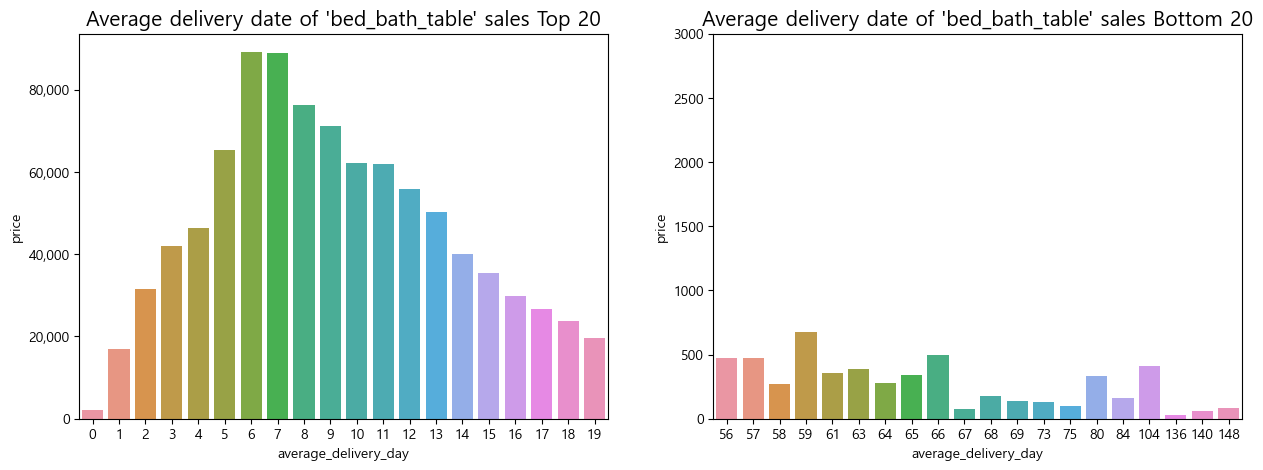

In [322]:
# 같은 카테고리 안에서 평균 배송일이 빠른 제품을 많이 선택하는가? (한국의 경우 로캣배송 여부에 따라 제품을 구매할지 결정하기도 함)

# 현재 데이터에서 79경우의 배송일이 존재, 배송일 기준 각각 상위 20개, 하위 20개 기준으로 배송일 평균값 확인


print("Average delivery date of 'bed_bath_table' sales Top 20 :",round(np.mean(df[df.product_category == 'bed_bath_table'].groupby('average_delivery_day')['price'].sum().sort_values(ascending=False)[:20].index),2) ,'day')
print("Average delivery date of 'bed_bath_table' sales Bottom 20 :",round(np.mean(df[df.product_category == 'bed_bath_table'].groupby('average_delivery_day')['price'].sum().sort_values(ascending=False)[-20:].index),2) ,'day')

a = df[df.product_category == 'bed_bath_table'].groupby('average_delivery_day')['price'].sum().sort_index()[:20].to_frame()
b = df[df.product_category == 'bed_bath_table'].groupby('average_delivery_day')['price'].sum().sort_index()[-20:].to_frame()

plt.figure(figsize = (15,5))
plt.subplot(121)
sns.barplot(data=a, x=a.index, y='price')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title("Average delivery date of 'bed_bath_table' sales Top 20", fontsize = 15)

plt.subplot(122)
sns.barplot(data=b, x=b.index, y='price')
plt.title("Average delivery date of 'bed_bath_table' sales Bottom 20", fontsize = 15)
plt.ylim([0, 3000])

plt.show()

# 평균 배송일이 빠른 경우의 매출이 높은 것을 확인, 브라질 소비자들도 배송일이 빠른 제품을 사는 경향이 있음

Average delivery date of sales Top 30 : 15.5 day
Average delivery date of sales Bottom 30 : 132.9 day


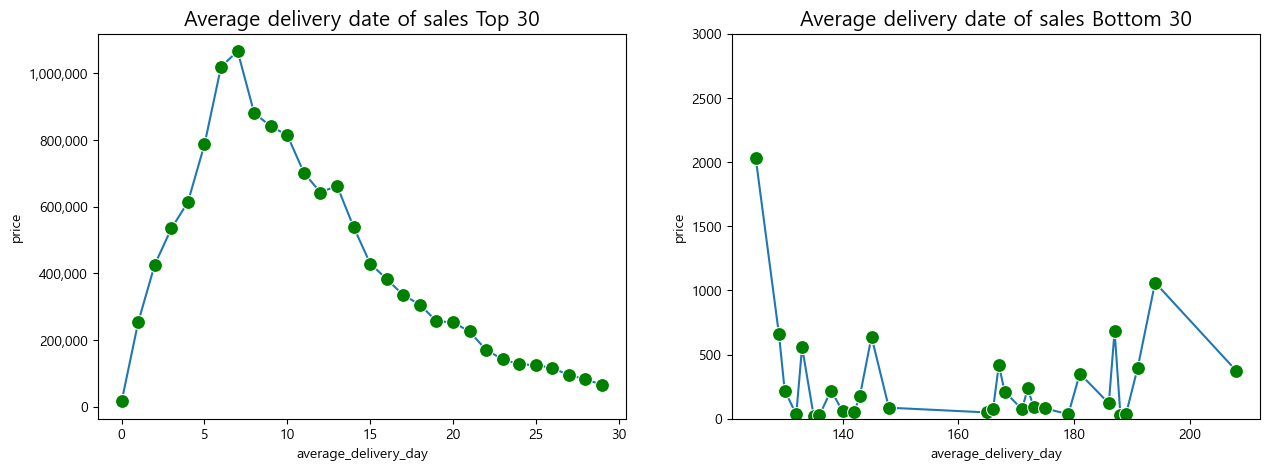

In [78]:
# 평균 배송일이 빠른 제품을 많이 선택하는가? (한국의 경우 로캣배송 여부에 따라 제품을 구매할지 결정하기도 함)

# 현재 데이터에서 147경우의 배송일이 존재, 배송일 기준 각각 상위 30개, 하위 30개 기준으로 배송일 평균값 확인

print('Average delivery date of sales Top 30 :',round(np.mean(df.groupby('average_delivery_day')['price'].sum().sort_values(ascending=False)[:30].index),2) ,'day')
print('Average delivery date of sales Bottom 30 :',round(np.mean(df.groupby('average_delivery_day')['price'].sum().sort_values(ascending=False)[-30:].index),2) ,'day')

a = df.groupby('average_delivery_day')['price'].sum().sort_index()[:30].to_frame()
b = df.groupby('average_delivery_day')['price'].sum().sort_index()[-30:].to_frame()

plt.figure(figsize = (15,5))
plt.subplot(121)
sns.lineplot(data=a, x=a.index, y='price', marker='o',markersize=10,  mfc='green')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Average delivery date of sales Top 30', fontsize = 15)

plt.subplot(122)
sns.lineplot(data=b, x=b.index, y='price', marker='o',markersize=10,  mfc='green')
plt.title('Average delivery date of sales Bottom 30', fontsize = 15)
plt.ylim([0, 3000])

plt.show()

# 평균 배송일이 빠른 경우의 매출이 높은 것을 확인, 브라질 소비자들도 배송일이 빠른 제품을 사는 경향이 있음

# 제품(카테고리별) EDA

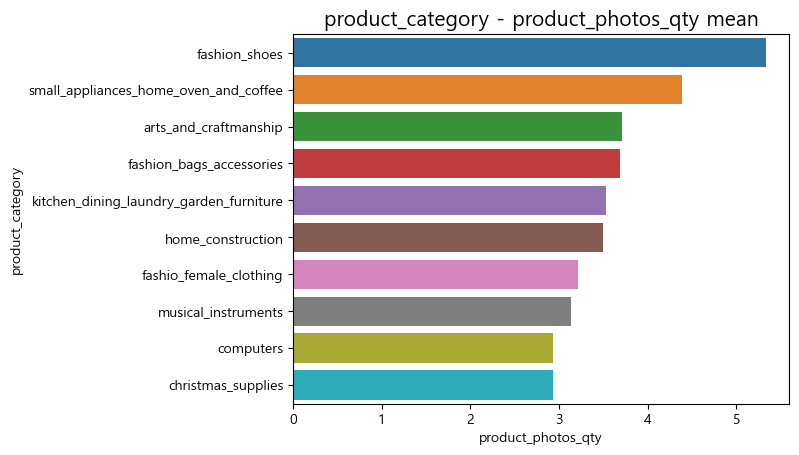

In [324]:
# 제품 카테고리별 제품 사진 평균 수

a = df.groupby('product_category')['product_photos_qty'].mean().sort_values(ascending=False)[:10].to_frame()

sns.barplot(data=a, y=a.index, x='product_photos_qty')
plt.title('product_category - product_photos_qty mean', fontsize = 15)
plt.show()


freight_value  product_weight_g  product_length_cm  \
freight_value               1.00              0.61               0.30   
product_weight_g            0.61              1.00               0.46   
product_length_cm           0.30              0.46               1.00   
product_height_cm           0.39              0.58               0.19   

                   product_height_cm  
freight_value                   0.39  
product_weight_g                0.58  
product_length_cm               0.19  
product_height_cm               1.00

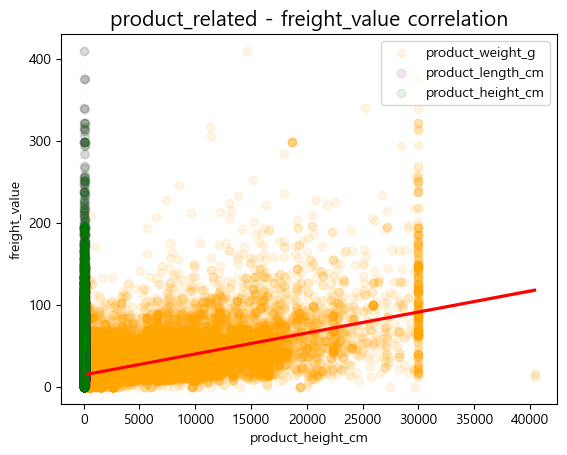

In [177]:
# 제품 무게, 크기가 높을수록 화물 가격이 높은지 연관성 확인

display(df[['freight_value', 'product_weight_g', 'product_length_cm','product_height_cm']].corr())

sns.regplot(data= df, x='product_weight_g', y='freight_value', color = 'orange', scatter_kws={'alpha':0.1}, label = 'product_weight_g', line_kws={'color' : 'red'})
sns.regplot(data= df, x='product_length_cm', y='freight_value', color = 'purple', scatter_kws={'alpha':0.1}, label = 'product_length_cm', line_kws={'color' : 'purple'})
sns.regplot(data= df, x='product_height_cm', y='freight_value', color = 'green', scatter_kws={'alpha':0.1}, label = 'product_height_cm', line_kws={'color' : 'green'})
plt.legend(loc='upper right')
plt.title('product_related - freight_value correlation', fontsize = 15)
plt.show()

# correlation 값과, 추세가 우상향으로 그려진 것을 보아 제품의 무게가 클수록 화물 가격이 증가한다고 볼 수 있음

In [259]:
# 기존 데이터에 geolocation 위도, 경도 데이터 merge -> 위도, 경도 미터(meter)로 변환 -> 소비자와 판매자의 위도, 경도 차이를 구해서 운송 비용을 비교

cust = df[['freight_value', 'customer_zip_code_prefix']].rename(columns = {'customer_zip_code_prefix' : 'customer_zip_code'}) # customer zip code dataframe
sell = df[['freight_value','seller_zip_code_prefix']].rename(columns = {'seller_zip_code_prefix' : 'seller_zip_code', 'freight_value' : 'freight_value1'}) # seller zip code dataframe
geo = pd.read_csv('../Data_e-commerce/olist_geolocation_dataset.csv')

# 같은 우편번호지만 다른 위도, 경도 존재 -> groupby후 mean 값 적용
geo1 = geo.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index().rename(columns = {'geolocation_zip_code_prefix' : 'customer_zip_code', 'geolocation_lat' : 'customer_geolocation_lat', 'geolocation_lng' : 'customer_geolocation_lng'})
geo2 = geo.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index().rename(columns = {'geolocation_zip_code_prefix' : 'seller_zip_code','geolocation_lat' : 'seller_geolocation_lat', 'geolocation_lng' : 'seller_geolocation_lng'})


# customer 소비자 우편번호 기준 merge / 소비자 우편번호가 14841개
# seller 판매자 우편번호 기준 merge / 판매자 우편번호가 2136개

cust_total = pd.merge(cust, geo1, on ='customer_zip_code', how = 'left')
sell_total = pd.merge(sell, geo2, on ='seller_zip_code', how = 'left')

print(cust_total.customer_zip_code.nunique(), sell_total.seller_zip_code.nunique()) # 잘 merge 됐는지 확인
cust_total.shape, sell_total.shape

# total merge
total = pd.concat([cust_total, sell_total], axis = 1)
total = total.drop(columns = ['freight_value1'])
display(total.shape)

# 위도, 경도 결측치 제거 / customer 298개, seller 260개
total = total.dropna()
total.isna().sum()

14841 2136


(113962, 7)

freight_value               0
customer_zip_code           0
customer_geolocation_lat    0
customer_geolocation_lng    0
seller_zip_code             0
seller_geolocation_lat      0
seller_geolocation_lng      0
dtype: int64

In [260]:
# 기존 데이터에 geolocation 위도, 경도 데이터 merge -> 위도, 경도 미터(meter)로 변환 -> 소비자와 판매자의 위도, 경도 차이를 구해서 운송 비용을 비교

from datashader.utils import lnglat_to_meters as webm # 위도, 경도 미터(meter)로 변환
cust_x, cust_y = webm(total.customer_geolocation_lng, total.customer_geolocation_lat)
total['customer_x'] = pd.Series(cust_x)
total['customer_y'] = pd.Series(cust_y)

sell_x, sell_y = webm(total.seller_geolocation_lng, total.seller_geolocation_lat)
total['seller_x'] = pd.Series(sell_x)
total['seller_y'] = pd.Series(sell_y)

total.head()

freight_value  customer_zip_code  customer_geolocation_lat  \
0           8.72               3149                    -23.58   
1           8.72               3149                    -23.58   
2           8.72               3149                    -23.58   
3           7.78               3366                    -23.56   
4           7.78               2290                    -23.60   

   customer_geolocation_lng  seller_zip_code  seller_geolocation_lat  \
0                    -46.59          9350.00                  -23.68   
1                    -46.59          9350.00                  -23.68   
2                    -46.59          9350.00                  -23.68   
3                    -46.53          9350.00                  -23.68   
4                    -46.66          9350.00                  -23.68   

   seller_geolocation_lng  customer_x  customer_y    seller_x    seller_y  
0                  -46.44 -5186059.07 -2701945.71 -5170148.95 -2714551.56  
1                  -46.44 -5186059.07 -2701945.71 -5170148.95 -2714551.56  
2                  -46.44 -5186059.07 -2701945.71 -5170148.95 -2714551.56  
3                  -46.44 -5180170.98 -2700445.37 -5170148.95 -2714551.56  
4                  -46.44 -5193646.23 -2704797.69 -5170148.95 -2714551.56

In [270]:
# L2 norm 사용하여 거리 계산
total['distance'] = np.sqrt( np.power( (total['customer_x'] - total['seller_x']) , 2 ) + np.power( (total['customer_y'] - total['seller_y']) , 2 ) )
total.head()

freight_value  customer_zip_code  customer_geolocation_lat  \
0           8.72               3149                    -23.58   
1           8.72               3149                    -23.58   
2           8.72               3149                    -23.58   
3           7.78               3366                    -23.56   
4           7.78               2290                    -23.60   

   customer_geolocation_lng  seller_zip_code  seller_geolocation_lat  \
0                    -46.59          9350.00                  -23.68   
1                    -46.59          9350.00                  -23.68   
2                    -46.59          9350.00                  -23.68   
3                    -46.53          9350.00                  -23.68   
4                    -46.66          9350.00                  -23.68   

   seller_geolocation_lng  customer_x  customer_y    seller_x    seller_y  \
0                  -46.44 -5186059.07 -2701945.71 -5170148.95 -2714551.56   
1                  -46.44 -5186059.07 -2701945.71 -5170148.95 -2714551.56   
2                  -46.44 -5186059.07 -2701945.71 -5170148.95 -2714551.56   
3                  -46.44 -5180170.98 -2700445.37 -5170148.95 -2714551.56   
4                  -46.44 -5193646.23 -2704797.69 -5170148.95 -2714551.56   

   distance  
0  20298.75  
1  20298.75  
2  20298.75  
3  17303.92  
4  25441.31

In [272]:
total.distance.describe()

count    113405.00
mean     639573.42
std      615001.25
min           0.00
25%      206197.00
50%      470629.98
75%      861331.91
max     9382181.97
Name: distance, dtype: float64

Text(0.5, 1.0, 'Distance Distribution')

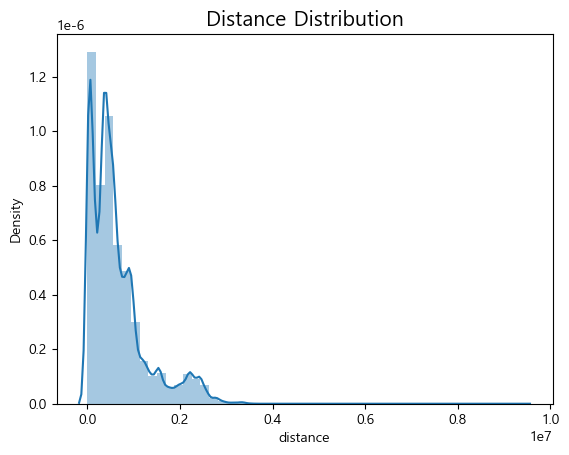

In [286]:
# distance 분포 확인
# current_values = plt.gca().get_xticks()
# plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
sns.distplot(total.distance)
plt.title('Distance Distribution', fontsize = 15)

freight_value  distance
freight_value           1.00      0.39
distance                0.39      1.00

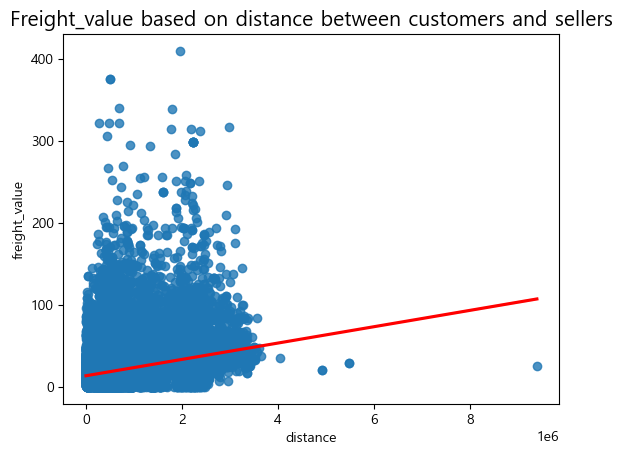

In [269]:
display(total[['freight_value', 'distance']].corr())

sns.regplot(data=total[['freight_value', 'distance']], x='distance', y='freight_value', line_kws={'color' : 'red'} )
plt.title('Freight_value based on distance between customers and sellers', fontsize = 15)
plt.show()

# 배송 관련 EDA

average_delivery_day  actual_estimate_diff_day  \
average_delivery_day                   1.00000                  0.594840   
actual_estimate_diff_day               0.59484                  1.000000   
review_score                          -0.30278                 -0.228508   

                          review_score  
average_delivery_day         -0.302780  
actual_estimate_diff_day     -0.228508  
review_score                  1.000000

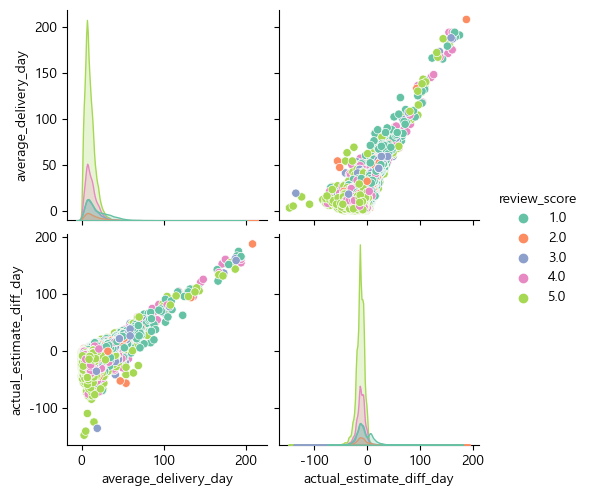

In [141]:
# 배송일, 예상 배송일, 만족도 연관성 확인

display(df[['average_delivery_day','actual_estimate_diff_day', 'review_score']].corr())

sns.pairplot(df[['average_delivery_day','actual_estimate_diff_day', 'review_score']], hue = 'review_score', palette='Set2')
plt.show()

average_delivery_day  actual_estimate_diff_day
review_score                                                
1.0                      18.655049                 -5.970593
2.0                      14.820005                 -9.830425
3.0                      13.080063                -11.117943
4.0                      11.330765                -12.466520
5.0                       9.764027                -13.448823

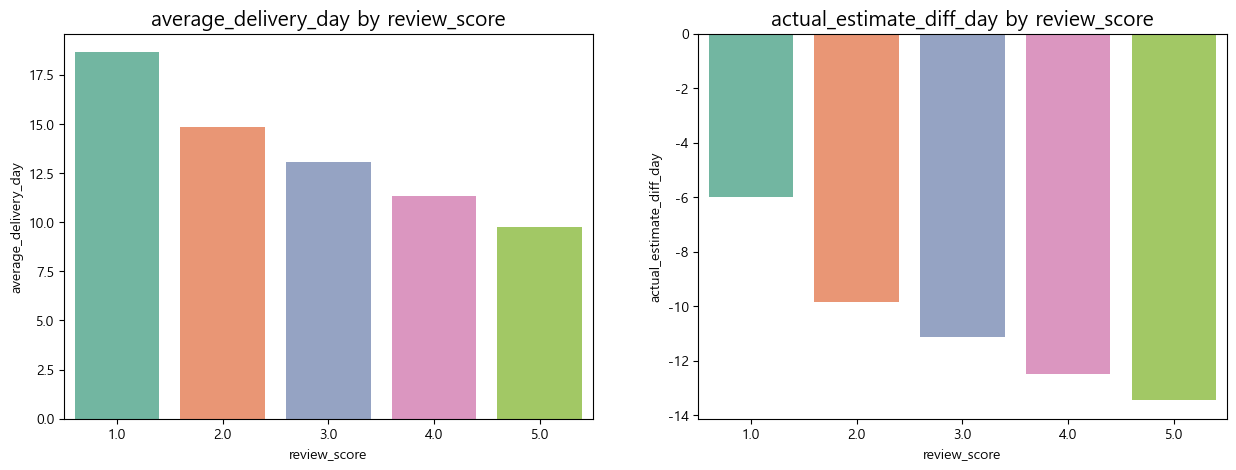

In [245]:
# -는 예상 배송일을 더 늦게(넉넉히) 잡은 경우, +는 실제 배송일이 더 늦은 경우 -> 분석을 위해 절댓값(abs)은 사용 X
# 실제 배송일이 더 늦은 경우의 review_score와 비교
# df['actual_estimate_diff_day'] = df['order_delivered_customer_date'] - df['order_estimated_delivery_date']

# review_score에 따른 'average_delivery_day','actual_estimate_diff_day' 평균값 확인

a = df.groupby('review_score')[['average_delivery_day','actual_estimate_diff_day']].mean()
display(a)

plt.figure(figsize =  (15,5))
plt.subplot(121)
sns.barplot(data=a, x=a.index, y='average_delivery_day', palette='Set2')
plt.title('average_delivery_day by review_score', fontsize = 15)

plt.subplot(122)
sns.barplot(data=a, x=a.index, y='actual_estimate_diff_day', palette='Set2')
plt.title('actual_estimate_diff_day by review_score', fontsize = 15)
plt.show()

# 배송일이 짧을수록, 예상 배송일보다 실제 배송일이 훨씬 빠른 경우에 review_score 값이 커지는 것을 확인

In [156]:
df['review_score'].value_counts().to_frame().sort_index()

review_score
1.00         12854
2.00          3839
3.00          9530
4.00         21804
5.00         65088

In [157]:
df[df.actual_estimate_diff_day > 0]['review_score'].value_counts().to_frame().sort_index()

review_score
1.00          3939
2.00           621
3.00           770
4.00           726
5.00          1187

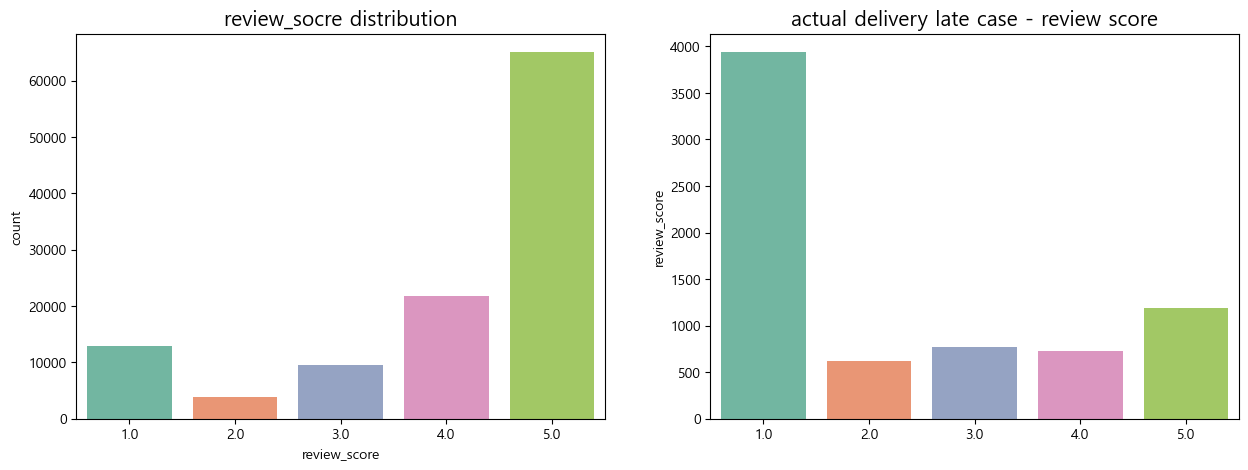

In [153]:
# 실제 배송일이 예상 배송일 보다 늦은 경우 (actual_estimate_diff_day가 양수인 경우)의 review_score확인

a = df[df.actual_estimate_diff_day > 0]['review_score'].value_counts().to_frame()

plt.figure(figsize =  (15,5))
plt.subplot(121)
sns.countplot(data=df, x='review_score', palette='Set2')
plt.title('review_socre distribution', fontsize = 15)

plt.subplot(122)
sns.barplot(data= a, x=a.index, y='review_score', palette='Set2')
plt.title('actual delivery late case - review score', fontsize = 15)
plt.show()

# 실제 배송일이 예상 배송일 보다 늦은 경우의 review_score가 확실히 낮은 것을 확인
# 배송일이 만족도에 큰 영향을 끼치는 것을 확인!

<AxesSubplot: xlabel='actual_estimate_diff_day', ylabel='Density'>

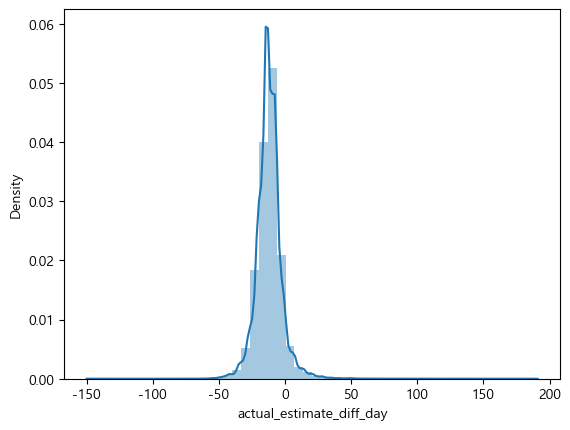

In [241]:
sns.distplot(df['actual_estimate_diff_day'])

average_delivery_day  review_score
average_delivery_day                  1.00         -0.30
review_score                         -0.30          1.00

review_score
1.00          1633
2.00           548
3.00          1142
4.00          2209
5.00          6148

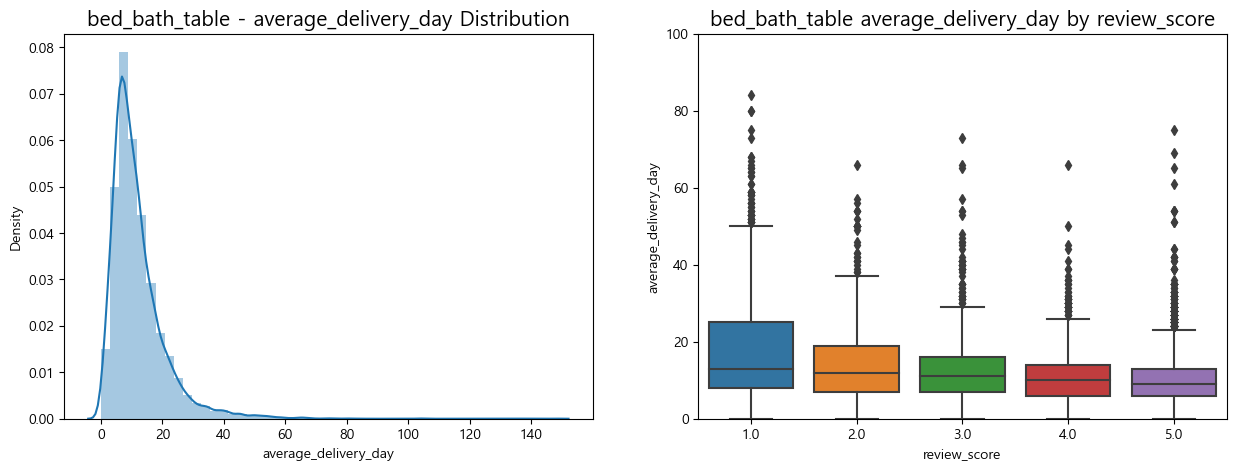

review_score
1.00           990
2.00           235
3.00           753
4.00          1758
5.00          6002

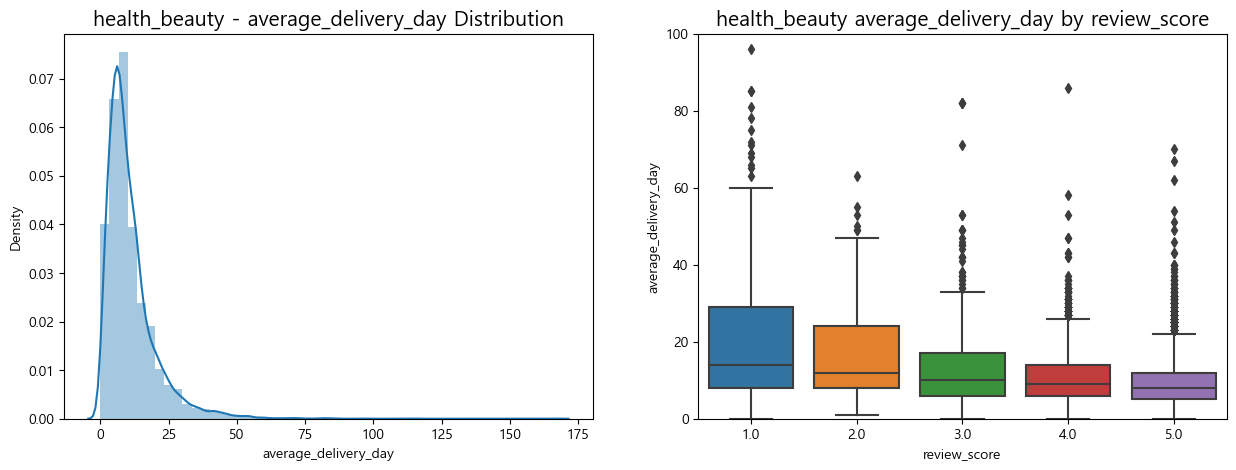

review_score
1.00           906
2.00           229
3.00           649
4.00          1687
5.00          5258

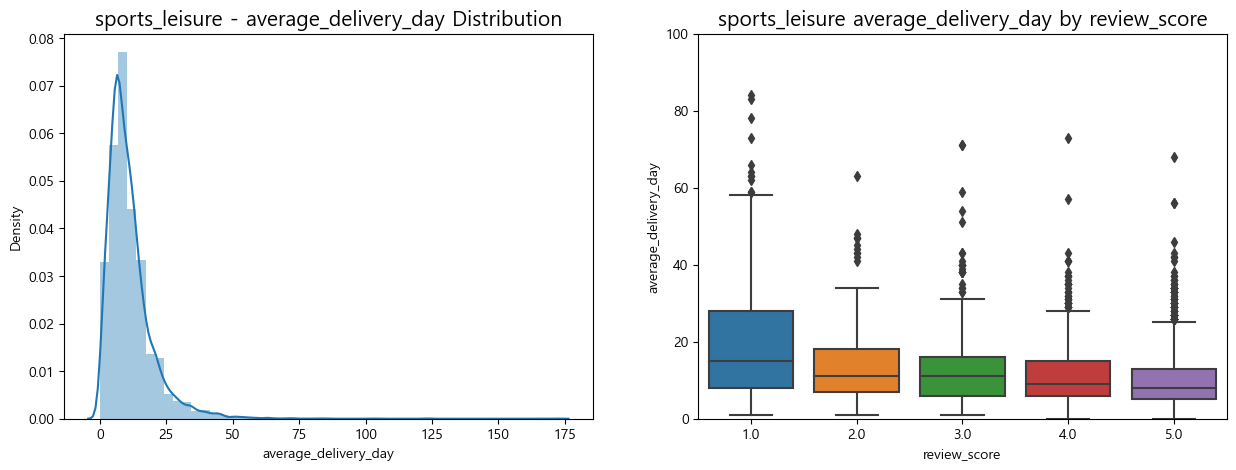

review_score
1.00          1171
2.00           370
3.00           766
4.00          1566
5.00          4671

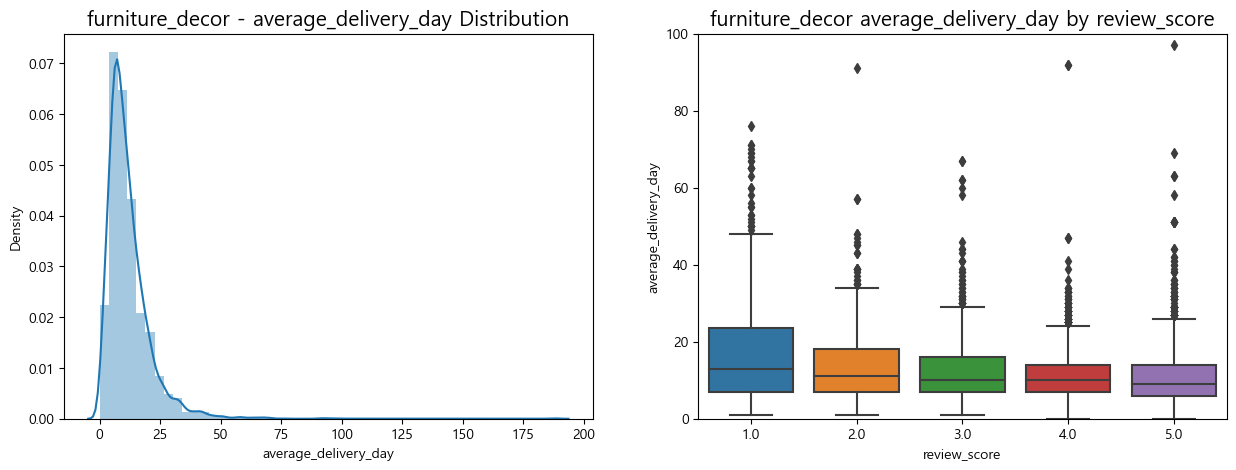

review_score
1.00          1066
2.00           273
3.00           678
4.00          1575
5.00          4332

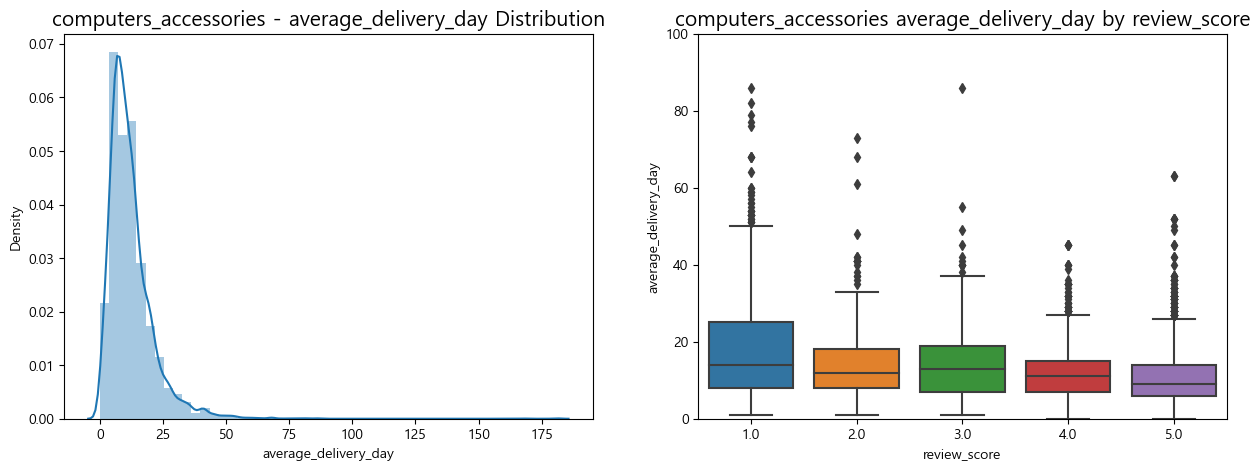

In [325]:
# 같은 제품이라면 배송일이 짧은 제품을 선택할 것이다 (거래 건수 상위 5개의 카테고리에서 확인)

display(df[['average_delivery_day', 'review_score']].corr())

for i in df.product_category.value_counts()[:5].index :
    display(df[df.product_category==i]['review_score'].value_counts().sort_index().to_frame())

    plt.figure(figsize = (15,5))
    plt.subplot(121)
    sns.distplot(df[df.product_category==i]['average_delivery_day'])
    plt.title(f'{i} - average_delivery_day Distribution', fontsize = 15)

    plt.subplot(122)
    sns.boxplot(data = df[df.product_category==i], x = 'review_score', y='average_delivery_day')
    plt.ylim([0, 100])
    plt.title(f'{i} average_delivery_day by review_score', fontsize = 15)
    plt.show()

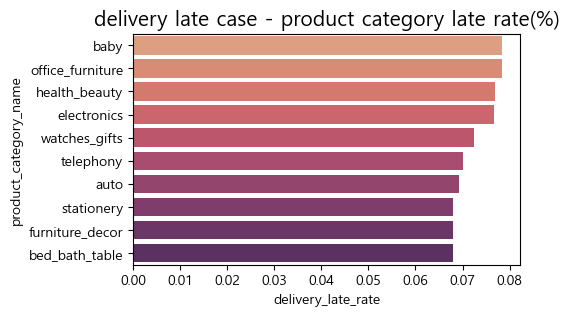

In [147]:
# 카테고리별 늦은 경우의 비율 비율로 확인

a = df.product_category.value_counts().to_frame().reset_index().rename(columns = {'index' : 'product_category_name'})
b = df[df.actual_estimate_diff_day > 0]['product_category'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'product_category_name'})

c = pd.merge(a,b, on = 'product_category_name')
c['delivery_late_rate'] = c['product_category_y'] / c['product_category_x']
c = c.sort_values('delivery_late_rate', ascending = False)

# 거래가 최소 1000건 이상인 경우의 비율 확인

plt.figure(figsize = (5,3))
sns.barplot(data = c[c.product_category_x >= 1000][:10], y='product_category_name', x='delivery_late_rate', palette = 'flare')
plt.title('delivery late case - product category late rate(%)', fontsize = 15)
plt.show()

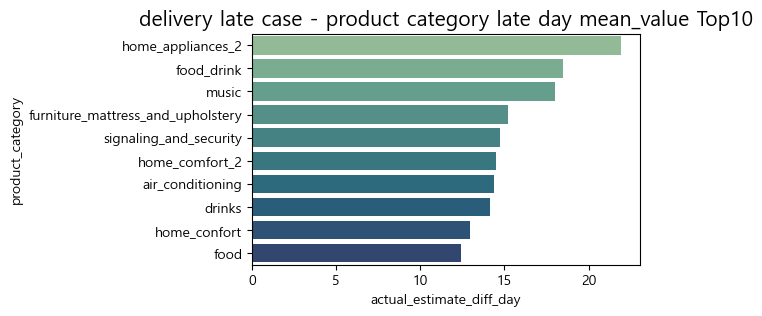

In [152]:
# 늦은 경우의 카테고리별 날짜 평균값
b = df[df.actual_estimate_diff_day > 0].groupby('product_category')['actual_estimate_diff_day'].mean().sort_values(ascending=False)[:10].to_frame()
plt.figure(figsize = (5,3))
sns.barplot(data=b, y=b.index, x='actual_estimate_diff_day', palette='crest')
plt.title('delivery late case - product category late day mean_value Top10', fontsize = 15)

plt.show()

In [111]:
# 가전제품, 식음료, 음악, 침대 매트리스와 커버, 에어컨 등 주로 가전제품의 평균 배송 지연 기간이 높은 것을 확인
b

actual_estimate_diff_day
product_category                                           
home_appliances_2                                     21.93
food_drink                                            18.45
music                                                 18.00
furniture_mattress_and_upholstery                     15.20
signaling_and_security                                14.75
home_comfort_2                                        14.50
air_conditioning                                      14.36
drinks                                                14.12
home_confort                                          12.97
food                                                  12.44

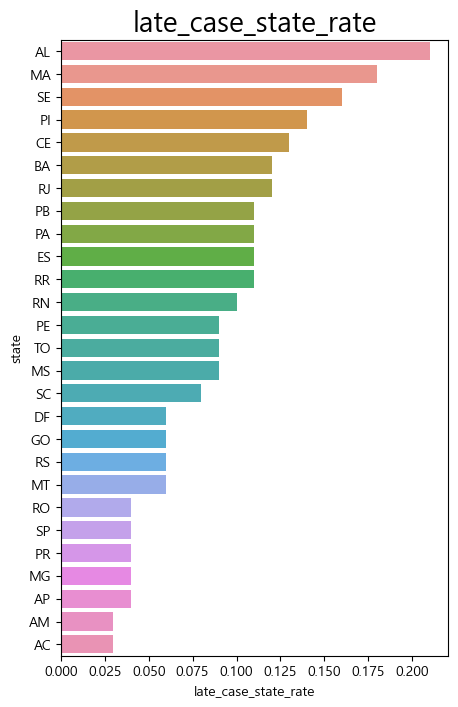

In [164]:
# 배송 지연이 많은 주(state) 확인 / 분포가 다르므로 비율로 구하여 비교

a = df[df.actual_estimate_diff_day > 0]['customer_state'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'state'})
b = df.customer_state.value_counts().to_frame().reset_index().rename(columns = {'index' : 'state'})

c = pd.merge(a,b, on = 'state')
c['late_case_state_rate'] = round(c['customer_state_x'] / c['customer_state_y'] ,2)
c = c.sort_values('late_case_state_rate', ascending=False)

plt.figure(figsize = (5,8))
# plt.subplot(211)
# sns.countplot(data=df, x='customer_state')
# plt.title("customer_state Distribution", fontsize = 20)

# plt.subplot(212)
sns.barplot(data=c, y='state', x='late_case_state_rate')
plt.title('late_case_state_rate', fontsize = 20)
plt.show()

In [170]:
df.seller_state.value_counts()

SP    81272
MG     8865
PR     8808
RJ     4813
SC     4174
RS     2214
DF      921
BA      681
GO      528
PE      462
MA      407
ES      371
MT      146
CE       99
MS       60
RN       56
PB       39
RO       14
PI       11
SE       10
PA        8
AM        3
Name: seller_state, dtype: int64

# 리뷰 관련 EDA

In [288]:
# review 컬럼만 가지고 분석 시작
review_lst = []
for i in df.columns[df.columns.str.contains('review')] :
    review_lst.append(i)

review_lst

['review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

In [290]:
review = df[review_lst]
review = review.drop(columns=['review_comment_title', 'review_creation_date', 'review_answer_timestamp'])
review = review.dropna()
review = review.reset_index(drop=True)
review

review_score                             review_comment_message
0              4.00  Não testei o produto ainda, mas ele veio corre...
1              4.00  Não testei o produto ainda, mas ele veio corre...
2              4.00  Não testei o produto ainda, mas ele veio corre...
3              4.00  Deveriam embalar melhor o produto. A caixa vei...
4              5.00  Só achei ela pequena pra seis xícaras ,mais é ...
...             ...                                                ...
47315          5.00  Atendimento excelente, agradeço a funcionária ...
47316          4.00  Adorei a rapidez com que chegou o produto, só ...
47317          5.00                                         😃 ótimo 👍 
47318          5.00                                         😃 ótimo 👍 
47319          4.00                                      otimo produto

[47320 rows x 2 columns]

In [20]:
# example
from googletrans import Translator
translator = Translator() # 객체 선언
translator.raise_Exception = True

# src 입력어 / dest 원하는 출력언어 [pt : portuguese(포르투갈어)]
print(translator.translate('안녕하세요', src = 'ko', dest='en').text)


def func(x) :
    return translator.translate(x, src = 'pt', dest='en').text

# 5개로 잘 되는지 test
a = review[:5]
a['review_comment_message'] = a['review_comment_message'].apply(func)
a

hello


review_score                             review_comment_message
0           4.0  I haven't tested the product yet, but it came ...
1           4.0  I haven't tested the product yet, but it came ...
2           4.0  I haven't tested the product yet, but it came ...
3           4.0  They should pack the product better.The box ca...
4           5.0  I only found her small for six cups, but it's ...

In [21]:
# 포루투갈어 -> 영어로 변환

def func(x) :
    return translator.translate(x, src = 'pt', dest='en').text

review['review_comment_message'] = review['review_comment_message'].apply(func)

Exception: Unexpected status code "429" from ('translate.google.com',)

In [292]:
review.tail()

review_score                             review_comment_message
47315          5.00  Atendimento excelente, agradeço a funcionária ...
47316          4.00  Adorei a rapidez com que chegou o produto, só ...
47317          5.00                                         😃 ótimo 👍 
47318          5.00                                         😃 ótimo 👍 
47319          4.00                                      otimo produto

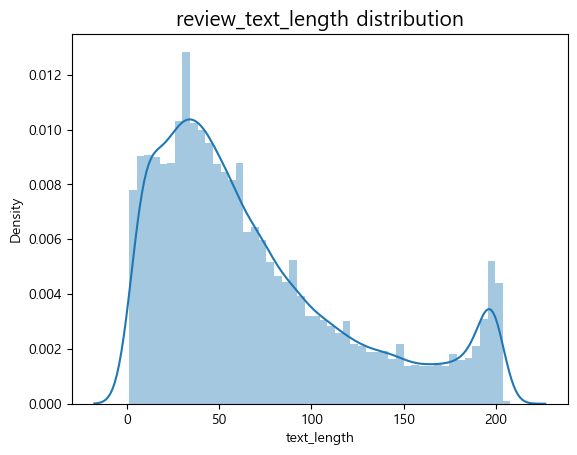

In [293]:
# 텍스트 길이 컬럼 추가
review['text_length'] =  review['review_comment_message'].apply(len)

# 텍스트 길이 분포 확인
sns.distplot(review['text_length'])
plt.title('review_text_length distribution', fontsize = 15)
plt.show()

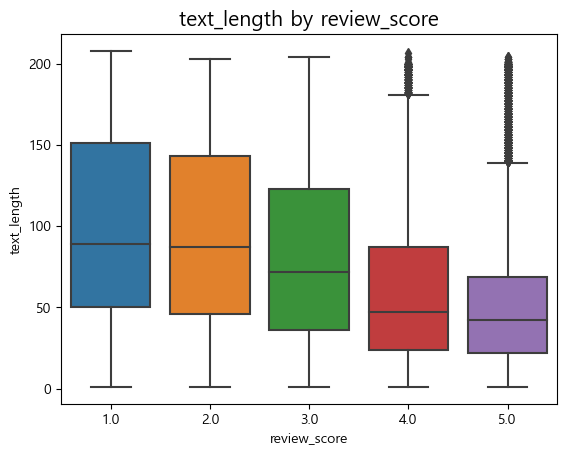

In [302]:
sns.boxplot(data=review, x='review_score', y='text_length')
plt.title('text_length by review_score', fontsize = 15)
plt.show()

In [300]:
review.groupby('review_score')['text_length'].mean()

review_score
1.00   100.67
2.00    97.25
3.00    84.26
4.00    62.75
5.00    51.81
Name: text_length, dtype: float64

In [294]:
# review text length와 review score의 상관관계 확인
review.corr()

review_score  text_length
review_score          1.00        -0.38
text_length          -0.38         1.00

In [295]:
# 불필요한 기호 제거
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [296]:
review['review_comment_message'] = review['review_comment_message'].apply(lambda x: ''.join( [i for i in x if i not in string.punctuation] ))

In [ ]:
# 상투적인 단어 제거
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords.words('portuguese')

In [298]:
review['review_comment_message'] = review['review_comment_message'].apply(lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('portuguese')])

In [319]:
review.head()

review_score                             review_comment_message  \
0           4.0  [testei, produto, ainda, veio, correto, boas, ...   
1           4.0  [testei, produto, ainda, veio, correto, boas, ...   
2           4.0  [testei, produto, ainda, veio, correto, boas, ...   
3           4.0  [deveriam, embalar, melhor, produto, caixa, ve...   
4           5.0  [achei, pequena, pra, seis, xícaras, bom, prod...   

   text_length  
0          170  
1          170  
2          170  
3           85  
4           62

In [320]:
# 단어 등장 빈도 확인

# 모든 단어를 하나의 리스트로 통합하기
word_split = []

for i in range(len(review)):
    for j in review.iloc[i]['review_comment_message']:
        word_split.append(j)

len(word_split)

343297

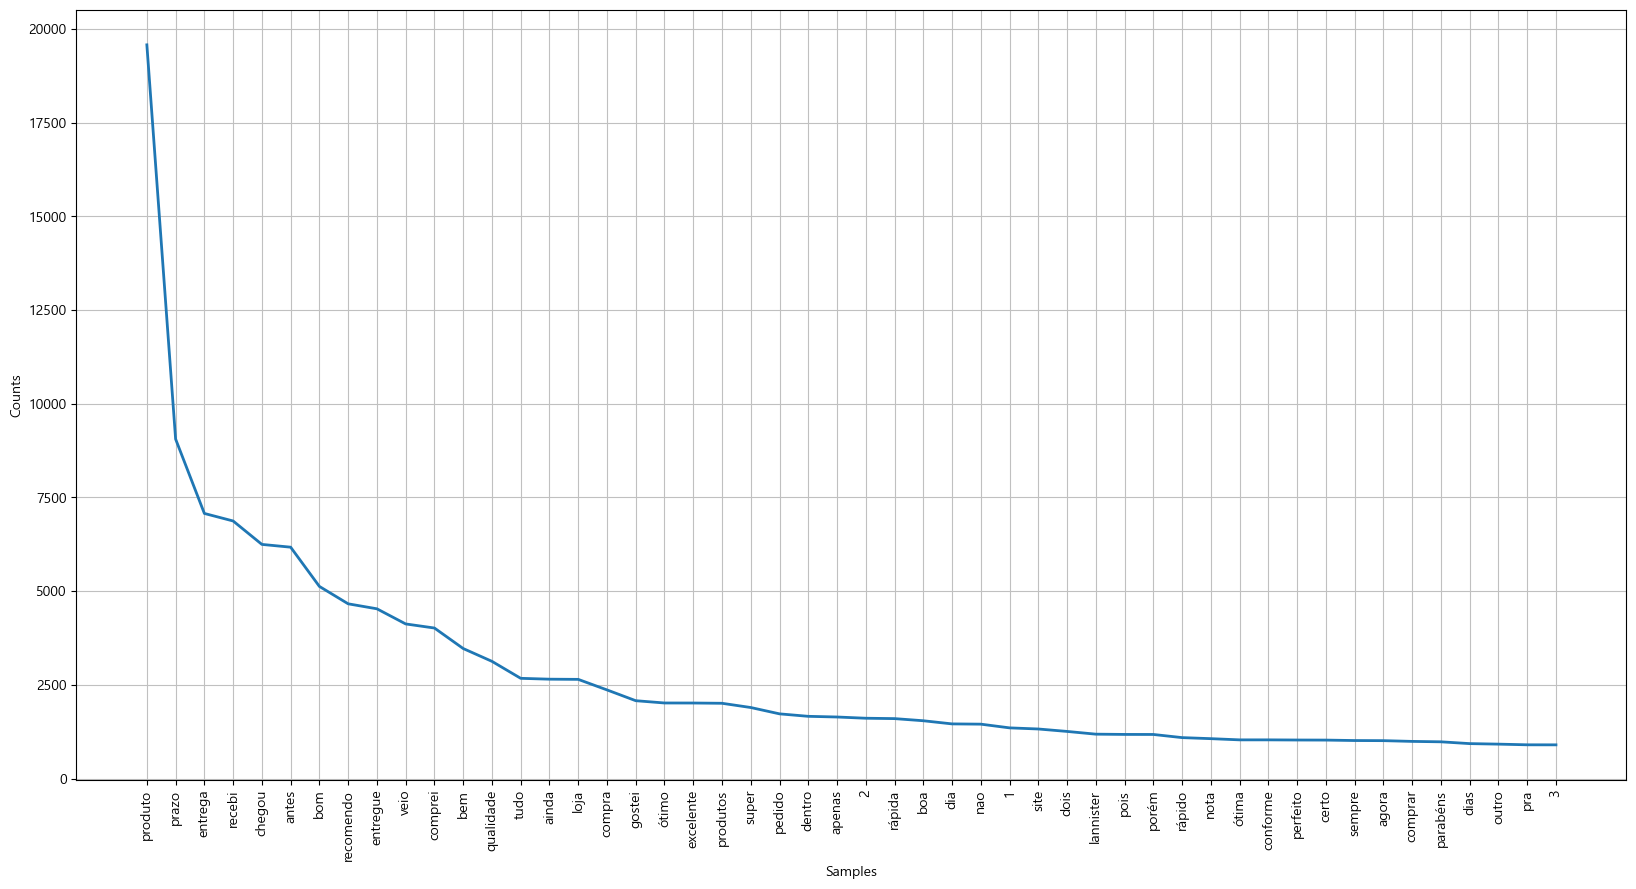

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [321]:
from nltk.probability import FreqDist
plt.figure(figsize=(20,10))
FreqDist(word_split).plot(50) # 상위 50개의 단어 보기

(-0.5, 399.5, 199.5, -0.5)

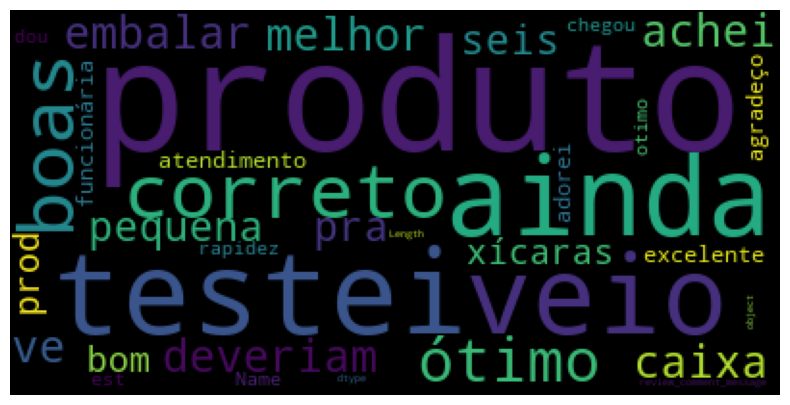

In [322]:
# word cloud 만들기
# wordcloud 모듈 안에 자체적으로 내장하고 있는 stopword가 있음 (상투적인 표현 필터링을 한 번 더 함)

from wordcloud import WordCloud

wc = WordCloud().generate(str(review['review_comment_message']))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

In [326]:
# 1,2 점 / 4,5 점의 review_comment_message에 대해 각각 Word Cloud 만들기

good = review[review['review_score'] < 3]['review_comment_message']
bad = review[review['review_score'] >= 4]['review_comment_message']

(-0.5, 399.5, 199.5, -0.5)

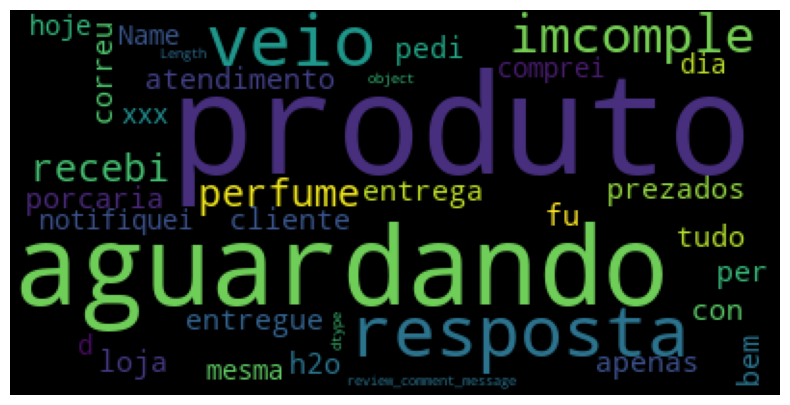

In [327]:
wc = WordCloud().generate(str(good))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

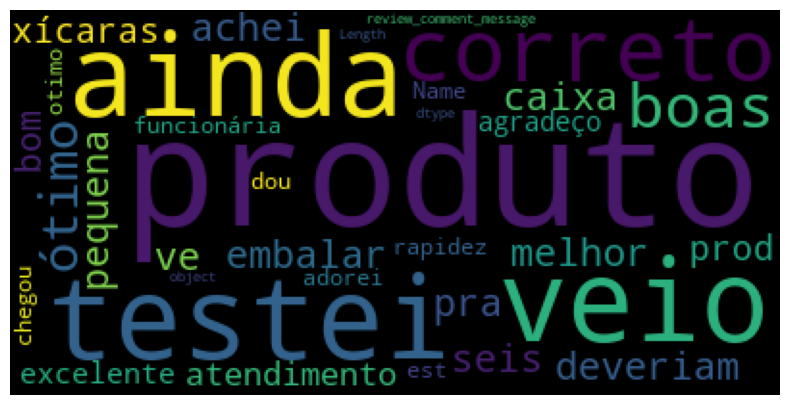

In [328]:
wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')